In [46]:
! pip install lifelines

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4138 sha256=dd304da2debc1767a1c7b428857412fe89b3c42e190b9bdfb025531e85a14d44
  Stored in directory: c:\users\romina\appdata\local\pip\cache\wheels\50\37\21\0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter


In [2]:
file_path = "8_Olink_Data_NPX_LOD_1710.txt"

In [5]:
base_cols = ["EID", "Year_of_birth", "Age_at_recruitment"]

In [6]:
diagnosis_cols = [f"Diagnoses_ICD10_{i}" for i in range (1, 259)]
diagnosis_cols.insert(0, "Diagnoses_ICD10")


In [7]:
date_cols = [f"Date_of_first_in-patient_diagnosis_ICD10_{i}" for i in range(1, 259)]
date_cols.insert(0, "Date_of_first_in-patient_diagnosis_ICD10")

In [11]:
use_cols = base_cols + diagnosis_cols + date_cols

In [16]:
df_peek = pd.read_csv(file_path, nrows=0)
print(df_peek.columns.tolist())

['EID\tSex\tYear_of_birth\tMonth_of_birth\tEthnic_background\tAge_when_attended_assessment_centre\tAge_when_attended_assessment_centre_1\tPlate\tAge_when_attended_assessment_centre_2\tAge_when_attended_assessment_centre_3\tAge_at_recruitment\tTotal_volume_of_peri-ventricular_white_matter_hyperintensities\tTotal_volume_of_deep_white_matter_hyperintensities\tVolume_of_thalamus_(left)\tVolume_of_thalamus_(right)\tVolume_of_caudate_(left)\tVolume_of_caudate_(right)\tVolume_of_putamen_(left)\tVolume_of_putamen_(right)\tVolume_of_pallidum_(left)\tVolume_of_pallidum_(right)\tVolume_of_hippocampus_(left)\tVolume_of_hippocampus_(right)\tVolume_of_amygdala_(left)\tVolume_of_amygdala_(right)\tVolume_of_accumbens_(left)\tVolume_of_accumbens_(right)\tTotal_volume_of_white_matter_hyperintensities_(from_T1_and_T2_FLAIR_images)\tVolume_of_EstimatedTotalIntraCranial_(whole_brain)\tAlbumin\tCreatinine\tC-reactive_protein\tTotal_protein\tNumber_of_proteins_measured\tNumber_of_proteins_measured_2\tNumber_

In [17]:
df = pd.read_csv(file_path, sep='\t', usecols=use_cols)


C:\Users\Romina\AppData\Local\Temp\ipykernel_40084\662675637.py:1: DtypeWarning: Columns (409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,78

In [18]:
df

,EID,Year_of_birth,Age_at_recruitment,Diagnoses_ICD10,Diagnoses_ICD10_1,Diagnoses_ICD10_2,Diagnoses_ICD10_3,Diagnoses_ICD10_4,Diagnoses_ICD10_5,Diagnoses_ICD10_6,...,Date_of_first_in-patient_diagnosis_ICD10_249,Date_of_first_in-patient_diagnosis_ICD10_250,Date_of_first_in-patient_diagnosis_ICD10_251,Date_of_first_in-patient_diagnosis_ICD10_252,Date_of_first_in-patient_diagnosis_ICD10_253,Date_of_first_in-patient_diagnosis_ICD10_254,Date_of_first_in-patient_diagnosis_ICD10_255,Date_of_first_in-patient_diagnosis_ICD10_256,Date_of_first_in-patient_diagnosis_ICD10_257,Date_of_first_in-patient_diagnosis_ICD10_258
0,1000024,1940,67,F009,F019,F03,G309,I10,I120,I48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000043,1945,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000156,1944,62,E039,E079,E871,H258,H269,H522,I10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000217,1945,63,B24,C060,I269,R509,R69,Z21,Z514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000309,1948,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52695,6023140,1953,55,F419,H264,H269,H521,I259,I319,I350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52696,6023206,1945,64,C447,D509,E831,G562,I10,I251,I340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52697,6023457,1960,48,D125,D128,E86,I841,I848,K566,K573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52698,6023548,1945,62,C155,C159,C160,C675,C679,C780,C786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
diagnosis_cols = [col for col in df.columns if col.startswith("Diagnoses_ICD10_")]
date_cols = [col for col in df.columns if col.startswith("Date_of_first_in-patient_diagnosis_ICD10_")]


In [20]:
df_diag_long = df.melt(id_vars=["EID", "Year_of_birth", "Age_at_recruitment"],
                       value_vars=diagnosis_cols,
                       var_name="diagnosis_col",
                       value_name="ICD10_code")

In [21]:
df_date_long = df.melt(id_vars=["EID"],
                       value_vars=date_cols,
                       var_name="date_col",
                       value_name="diagnosis_date")

In [22]:
df_diag_long["diag_num"] = df_diag_long["diagnosis_col"].str.extract(r"(\d+)$")
df_date_long["diag_num"] = df_date_long["date_col"].str.extract(r"(\d+)$")

In [23]:
df_long = pd.merge(df_diag_long, df_date_long, on=["EID", "diag_num"], how="inner")

In [24]:
df_long

,EID,Year_of_birth,Age_at_recruitment,diagnosis_col,ICD10_code,diag_num,date_col,diagnosis_date
0,1000024,1940,67,Diagnoses_ICD10_1,F019,1,Date_of_first_in-patient_diagnosis_ICD10_1,2011-05-28
1,1000043,1945,65,Diagnoses_ICD10_1,NaN,1,Date_of_first_in-patient_diagnosis_ICD10_1,NaN
2,1000156,1944,62,Diagnoses_ICD10_1,E079,1,Date_of_first_in-patient_diagnosis_ICD10_1,2021-03-15
3,1000217,1945,63,Diagnoses_ICD10_1,C060,1,Date_of_first_in-patient_diagnosis_ICD10_1,2010-05-30
4,1000309,1948,60,Diagnoses_ICD10_1,NaN,1,Date_of_first_in-patient_diagnosis_ICD10_1,NaN
...,...,...,...,...,...,...,...,...
13596595,6023140,1953,55,Diagnoses_ICD10_258,NaN,258,Date_of_first_in-patient_diagnosis_ICD10_258,NaN
13596596,6023206,1945,64,Diagnoses_ICD10_258,NaN,258,Date_of_first_in-patient_diagnosis_ICD10_258,NaN
13596597,6023457,1960,48,Diagnoses_ICD10_258,NaN,258,Date_of_first_in-patient_diagnosis_ICD10_258,NaN
13596598,6023548,1945,62,Diagnoses_ICD10_258,NaN,258,Date_of_first_in-patient_diagnosis_ICD10_258,NaN


In [ ]:

df_long = df_long.drop(columns=["diagnosis_col", "date_col", "diag_num"])

In [26]:
df_long

,EID,Year_of_birth,Age_at_recruitment,ICD10_code,diagnosis_date
0,1000024,1940,67,F019,2011-05-28
1,1000043,1945,65,NaN,NaN
2,1000156,1944,62,E079,2021-03-15
3,1000217,1945,63,C060,2010-05-30
4,1000309,1948,60,NaN,NaN
...,...,...,...,...,...
13596595,6023140,1953,55,NaN,NaN
13596596,6023206,1945,64,NaN,NaN
13596597,6023457,1960,48,NaN,NaN
13596598,6023548,1945,62,NaN,NaN


In [27]:
df_long = df_long[df_long["ICD10_code"].notna()]

In [28]:
df_long

,EID,Year_of_birth,Age_at_recruitment,ICD10_code,diagnosis_date
0,1000024,1940,67,F019,2011-05-28
2,1000156,1944,62,E079,2021-03-15
3,1000217,1945,63,C060,2010-05-30
5,1000446,1939,69,I10,2017-07-06
6,1000522,1948,60,G473,2020-09-08
...,...,...,...,...,...
10893080,4511214,1957,52,Z931,2018-09-20
10933991,3399413,1957,51,Z960,2011-10-05
10945780,4511214,1957,52,Z944,2006-06-10
10986691,3399413,1957,51,Z991,2020-01-07


In [29]:
icd10_codes_mapping = {
    'alzheimer': ['G300', 'G309', 'G301', 'G310'],
    'dementia': ['F000', 'F001', 'F002', 'F009', 'F010', 'F011', 'F012', 'F013', 'F018', 'F019', 'F020', 'F021', 'F022', 'F023', 'F024', 'F028'],
    'stroke': ['I689', 'I635', 'I633', 'I638', 'I634'],
    'lbd': ['G318'],  
    'ms': ['G35'],  
    'als': ['G122'],  
    'parkinson': ['G20'],
    'delirium': ['F051'],
    'neurocognitive_disorder' : ['F067'], 
    'ns_degeneration' : ['G319', 'G328']
}

In [30]:
code_to_disease = {code: disease for disease, codes in icd10_codes_mapping.items() for code in codes}


In [31]:
df_long['disease_group'] = df_long['ICD10_code'].map(code_to_disease)

C:\Users\Romina\AppData\Local\Temp\ipykernel_40084\1591388902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['disease_group'] = df_long['ICD10_code'].map(code_to_disease)


In [32]:
df_neuro = df_long.dropna(subset=['disease_group']).copy()

In [33]:
df_neuro

,EID,Year_of_birth,Age_at_recruitment,ICD10_code,diagnosis_date,disease_group
0,1000024,1940,67,F019,2011-05-28,dementia
24,1002343,1945,62,G318,2017-06-07,lbd
59,1006011,1941,68,F009,2016-02-07,dementia
181,1017356,1940,68,G122,2022-08-15,als
254,1024241,1961,47,G319,2016-05-03,ns_degeneration
...,...,...,...,...,...,...
2202371,4977683,1955,54,I635,2019-08-23,stroke
2205908,5321647,1947,60,I633,2020-07-01,stroke
2275506,1898971,1952,57,I635,2021-07-16,stroke
2357681,4705211,1942,65,I635,2020-02-19,stroke


In [ ]:
# Convert diagnosis date to datetime
df_neuro['diagnosis_date'] = pd.to_datetime(df_neuro['diagnosis_date'], errors='coerce')

# event time
df_neuro['event_time'] = df_neuro['diagnosis_date'].dt.year - df_neuro['Year_of_birth']

# they had the diagnosis
df_neuro['event_observed'] = 1

In [36]:
# Identify all participants who had any neurodegenerative disease
case_eids = df_neuro['EID'].unique()

# Create a censored group from those NOT in case_eids
df_censored = df[~df['EID'].isin(case_eids)].copy()

# Use age at recruitment as censoring time
df_censored['event_time'] = df_censored['Age_at_recruitment']
df_censored['event_observed'] = 0

# Add a column to keep consistent format
df_censored['disease_group'] = 'none'

In [37]:
# Combine both case and censored data
df_survival = pd.concat([df_neuro[['EID', 'event_time', 'event_observed', 'disease_group']],
                         df_censored[['EID', 'event_time', 'event_observed', 'disease_group']]], ignore_index=True)


In [39]:
df_survival.rename(columns={'EID': 'eid'}, inplace=True)


In [41]:
organ_age_gap = pd.read_csv("organ_age_gaps_final.csv")

In [42]:
organ_age_gap

,eid,Adipose,Artery,Brain,Esophagus,Heart,Immune,Intestine,Kidney,Liver,Lung,Muscle,Pancreas,Skin,Stomach,Whole Blood,Organism_Model,All_Protein_Model
0,1000024,-9.143051,-4.981655,4.178352,-9.890959,-8.563195,-5.443092,-8.612221,-9.819948,-1.406451,-5.941911,-8.168053,-10.739258,-10.451964,-9.208523,-2.822113,1.341191,-2.166030
1,1000043,-8.915050,-5.970129,-2.217399,-7.373668,-10.641514,-4.284931,-1.694348,-8.467853,2.674622,-9.870583,-6.383359,-4.785891,-4.826189,-2.878227,-6.241980,0.000000,0.000000
2,1000156,-2.792091,-8.376524,-2.311218,-4.697093,-1.865260,-7.833528,-9.244810,-5.925379,0.706680,-2.882286,-6.613710,-8.235710,-7.747672,-6.857738,-8.733680,-4.482610,-4.140306
3,1000217,-4.695239,-7.736212,7.083564,-2.617013,-5.827723,-0.710769,5.535481,-4.522908,-0.844049,-3.726159,-4.975404,0.208766,-4.397638,-1.895467,4.569362,5.227259,2.936917
4,1000309,-5.584308,-7.996071,-1.665704,-1.089542,-3.186085,-1.484941,-2.116024,-0.559327,-6.103880,-3.012410,-2.040107,-2.416313,-2.243959,-3.202432,-4.199673,-0.588616,-2.471371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52695,6023140,-1.407284,-2.079217,-0.589227,-1.053575,2.672767,6.959924,7.164214,1.720104,-1.752905,1.877077,-1.825025,-4.189350,-0.442759,-1.733831,-0.992742,-1.620219,-0.269828
52696,6023206,-6.889302,-3.642802,-6.417696,-6.562487,-3.795801,-10.596840,-12.025010,-6.817563,-0.758853,-8.977458,-1.641125,-4.525371,-5.765624,-6.267097,-9.348222,-4.187179,-1.506090
52697,6023457,10.898675,7.599310,5.995820,8.910251,10.538261,10.399887,8.248674,9.821455,6.568791,5.834880,9.446080,10.104164,10.330164,6.659135,9.127780,5.392734,3.593958
52698,6023548,-2.696049,-1.783136,5.340057,-4.836762,-4.468050,-5.824312,2.561149,-4.153556,1.312810,-3.743193,-1.796088,-0.739186,-1.957090,1.442377,-2.383130,2.569806,0.669490


In [43]:
df_merged = df_survival.merge(organ_age_gap, on='eid', how='left')

In [44]:
df_merged

,eid,event_time,event_observed,disease_group,Adipose,Artery,Brain,Esophagus,Heart,Immune,...,Kidney,Liver,Lung,Muscle,Pancreas,Skin,Stomach,Whole Blood,Organism_Model,All_Protein_Model
0,1000024,71,1,dementia,-9.143051,-4.981655,4.178352,-9.890959,-8.563195,-5.443092,...,-9.819948,-1.406451,-5.941911,-8.168053,-10.739258,-10.451964,-9.208523,-2.822113,1.341191,-2.166030
1,1002343,72,1,lbd,-6.642809,-1.698654,-1.594955,-5.383031,-6.896181,-10.954464,...,-4.950498,-12.614187,-5.540639,-5.015614,-7.529888,-1.502454,-6.672107,-11.135122,-6.429847,-2.887275
2,1006011,75,1,dementia,-11.189788,-8.075164,-0.706298,-13.256648,-11.274012,-9.516524,...,-12.180859,-10.963278,-5.331135,-7.906554,-11.135057,-10.539842,-9.400056,-2.011681,2.254781,-0.912293
3,1017356,82,1,als,-11.445370,-8.167886,-4.319158,-6.102664,-10.302805,-8.360835,...,-12.194337,-5.303775,-8.554684,-11.772005,-7.629114,-5.338126,-10.482551,-11.749882,-5.364263,-5.263267
4,1024241,55,1,ns_degeneration,9.718941,8.202293,2.390786,7.631432,8.555370,5.272066,...,9.565817,10.365041,6.767982,12.087483,6.975039,8.326691,8.938711,1.649841,3.055504,1.839978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54368,6023140,55,0,none,-1.407284,-2.079217,-0.589227,-1.053575,2.672767,6.959924,...,1.720104,-1.752905,1.877077,-1.825025,-4.189350,-0.442759,-1.733831,-0.992742,-1.620219,-0.269828
54369,6023206,64,0,none,-6.889302,-3.642802,-6.417696,-6.562487,-3.795801,-10.596840,...,-6.817563,-0.758853,-8.977458,-1.641125,-4.525371,-5.765624,-6.267097,-9.348222,-4.187179,-1.506090
54370,6023457,48,0,none,10.898675,7.599310,5.995820,8.910251,10.538261,10.399887,...,9.821455,6.568791,5.834880,9.446080,10.104164,10.330164,6.659135,9.127780,5.392734,3.593958
54371,6023548,62,0,none,-2.696049,-1.783136,5.340057,-4.836762,-4.468050,-5.824312,...,-4.153556,1.312810,-3.743193,-1.796088,-0.739186,-1.957090,1.442377,-2.383130,2.569806,0.669490


In [48]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_AD = df_merged[df_merged['disease_group'].isin(['alzheimer', 'none'])].copy()


In [49]:

organ_cols = [
    'Adipose', 'Artery', 'Brain', 'Esophagus', 'Heart', 'Immune', 'Kidney',
    'Liver', 'Lung', 'Muscle', 'Pancreas', 'Skin', 'Stomach', 'Whole Blood'
]

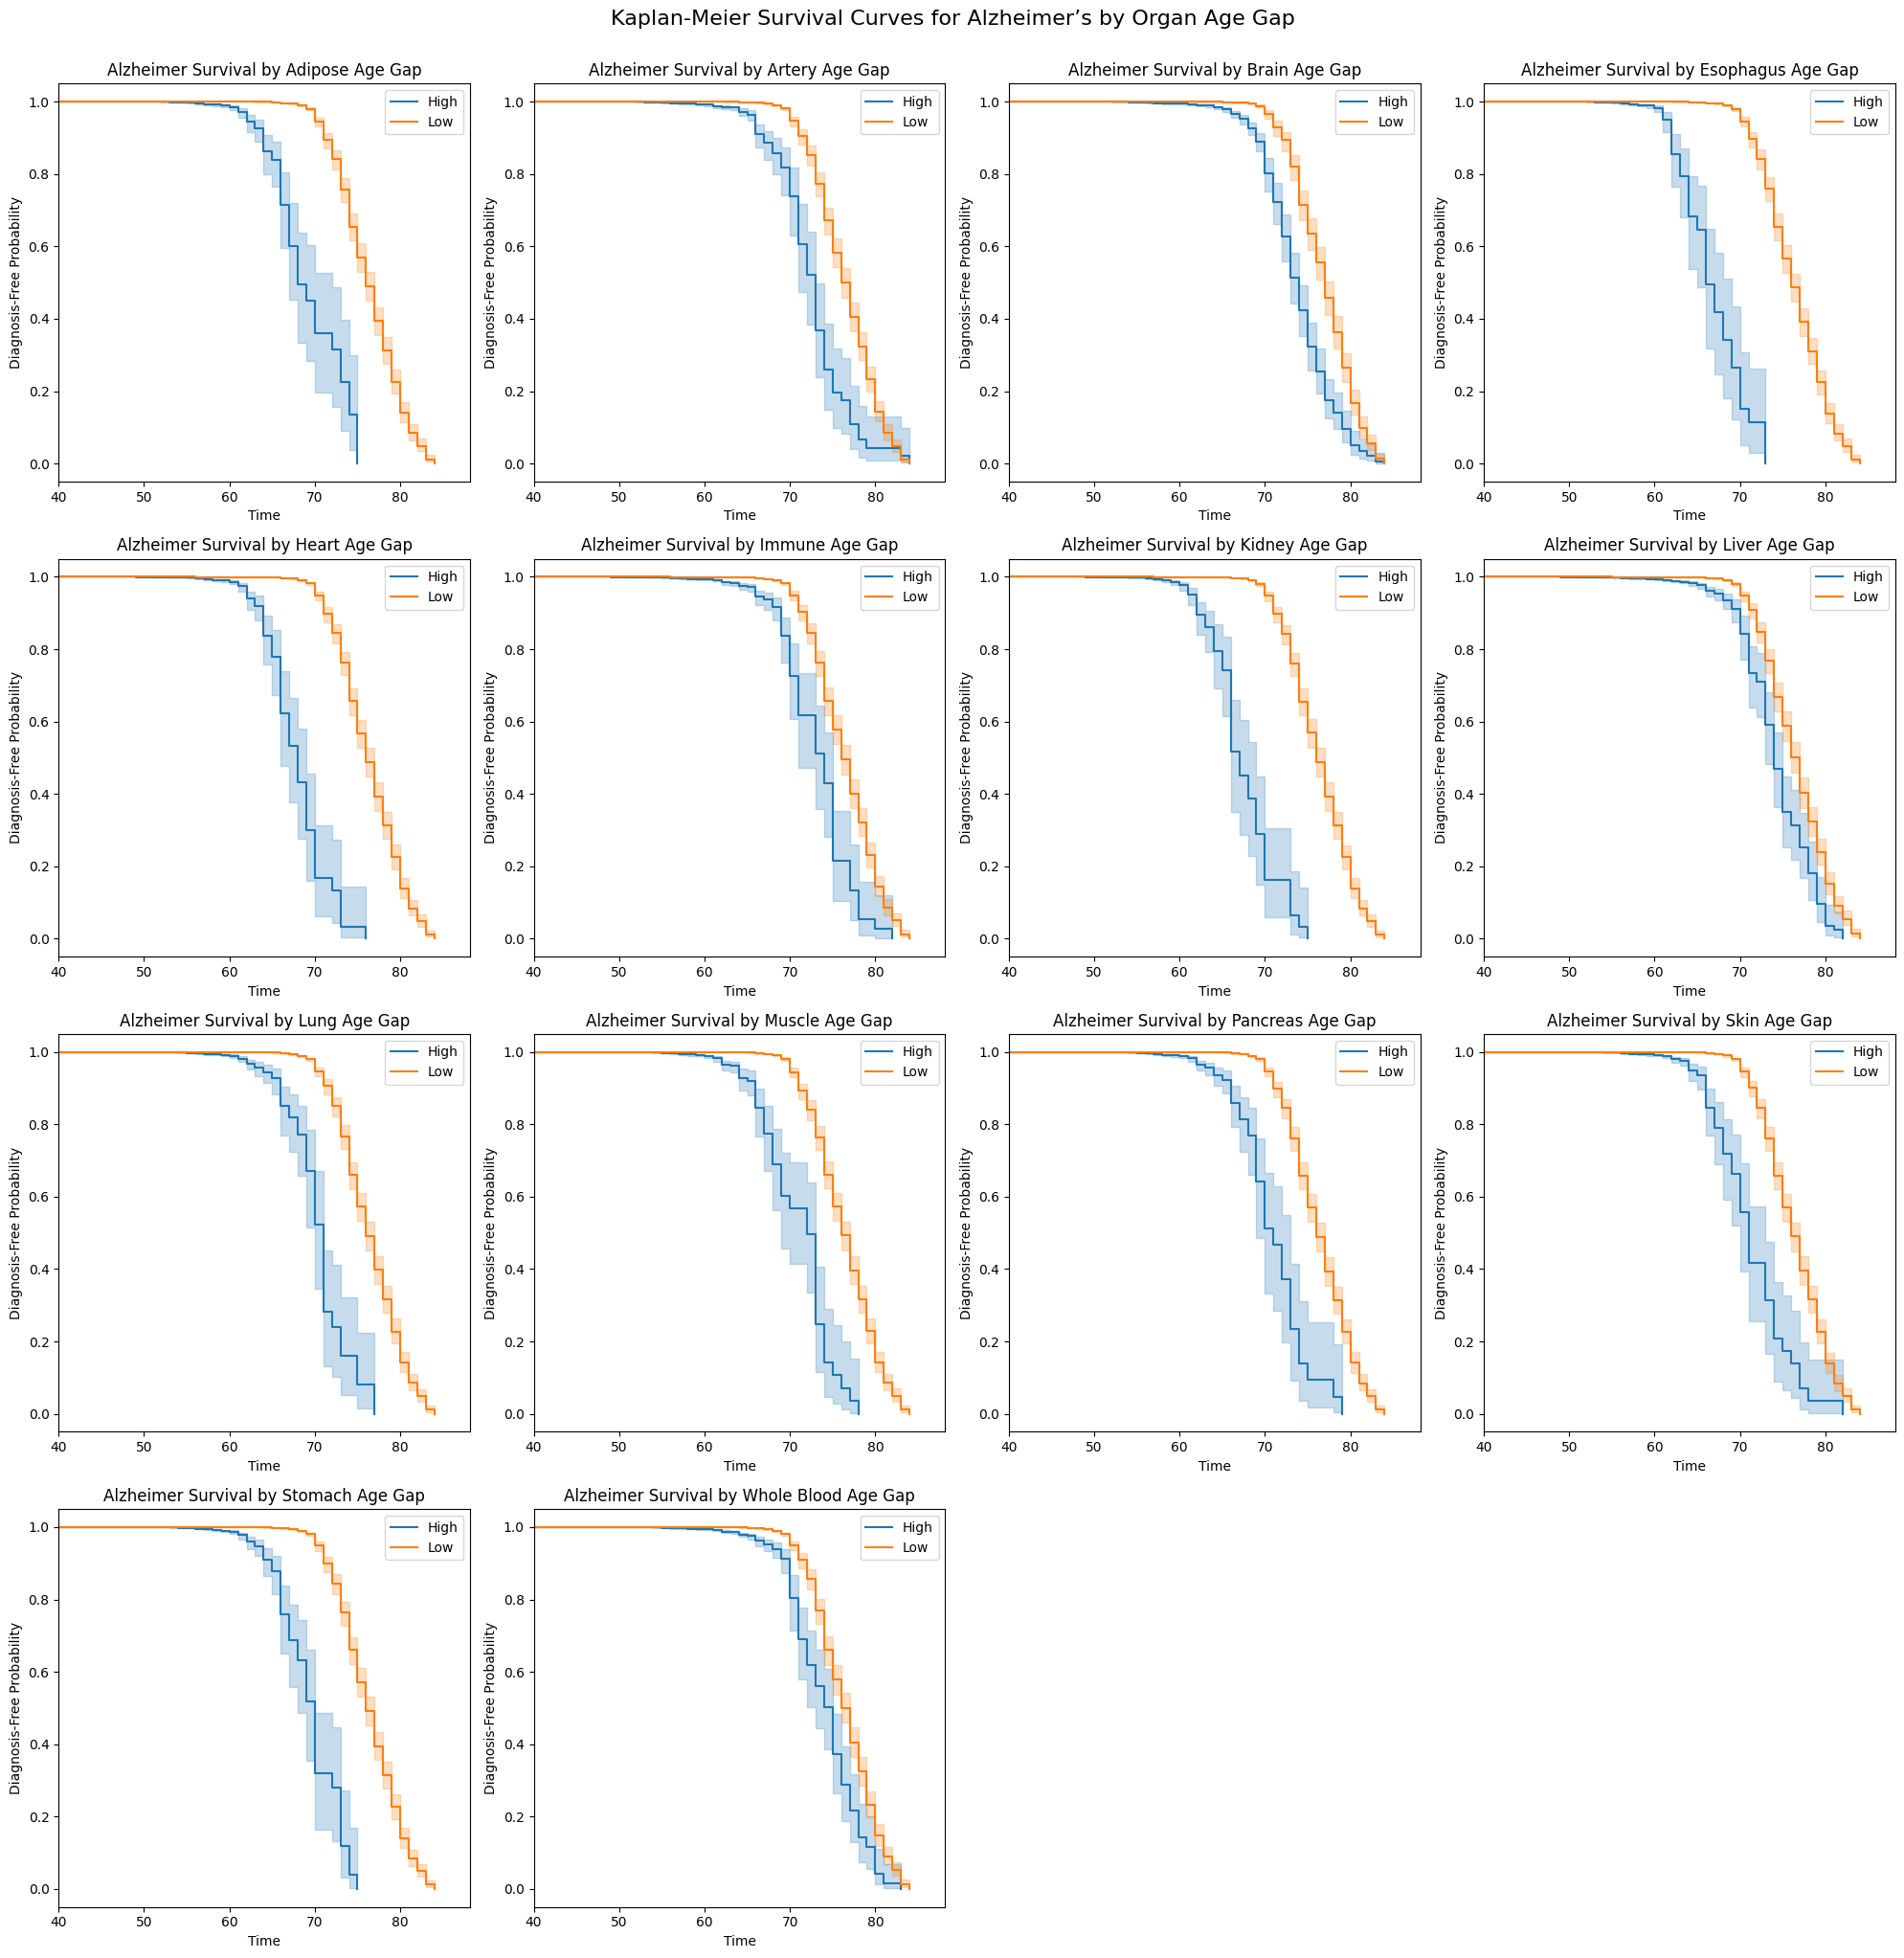

In [113]:

num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_AD[organ].median()
    df_AD['organ_group'] = df_AD[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_AD['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_AD[mask]['event_time'], df_AD[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'Alzheimer Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')
    ax.set_xlim(left=40)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for Alzheimer’s by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("alzheimers_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:

results = []

for organ in organ_cols:
    df_temp = df_AD[['event_time', 'event_observed', organ]].dropna()
    df_temp = df_temp.rename(columns={organ: 'OrganAgeGap'})
    
    cph = CoxPHFitter()
    cph.fit(df_temp, duration_col='event_time', event_col='event_observed')
    
    summary = cph.summary
    summary['organ'] = organ
    results.append(summary)

# Combine all summaries
all_results_df = pd.concat(results)

# Reorder columns for clarity
all_results_df = all_results_df.reset_index(drop=True)
cols_order = ['organ', 'coef', 'exp(coef)', 'se(coef)', 'p', 'exp(coef) lower 95%', 'exp(coef) upper 95%']
all_results_df = all_results_df[cols_order]

all_results_df

,organ,coef,exp(coef),se(coef),p,exp(coef) lower 95%,exp(coef) upper 95%
0,Adipose,0.272657,1.313450,0.010320,7.991510e-154,1.287150,1.340287
1,Artery,0.157851,1.170992,0.009050,3.957222e-68,1.150404,1.191948
2,Brain,0.164515,1.178821,0.008692,6.826422e-80,1.158909,1.199076
3,Esophagus,0.353115,1.423494,0.011416,4.557510e-210,1.391997,1.455704
4,Heart,0.315678,1.371189,0.011592,2.642527e-163,1.340388,1.402698
5,Immune,0.145814,1.156981,0.009068,3.559298e-58,1.136599,1.177728
6,Kidney,0.349592,1.418489,0.010559,2.160009e-240,1.389435,1.448149
7,Liver,0.109279,1.115474,0.008220,2.524786e-40,1.097645,1.133592
8,Lung,0.234558,1.264350,0.010351,1.089395e-113,1.238958,1.290262
9,Muscle,0.224961,1.252274,0.009545,7.892812e-123,1.229066,1.275921


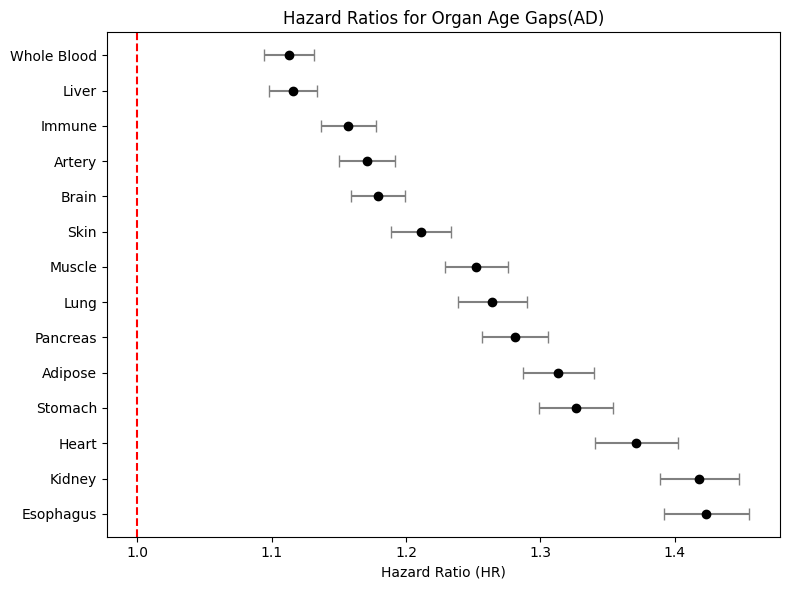

In [78]:
all_results_df_sorted = all_results_df.sort_values(by='exp(coef)', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
organs = all_results_df_sorted['organ']
hr = all_results_df_sorted['exp(coef)']
lower_ci = all_results_df_sorted['exp(coef) lower 95%']
upper_ci = all_results_df_sorted['exp(coef) upper 95%']

# Plot horizontal lines for confidence intervals
ax.errorbar(hr, organs, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Add a vertical line at HR = 1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

ax.set_xlabel('Hazard Ratio (HR)')
ax.set_title('Hazard Ratios for Organ Age Gaps(AD)')
plt.tight_layout()
plt.savefig("HR_age_gap_AD", dpi=300, bbox_inches='tight')
plt.show()

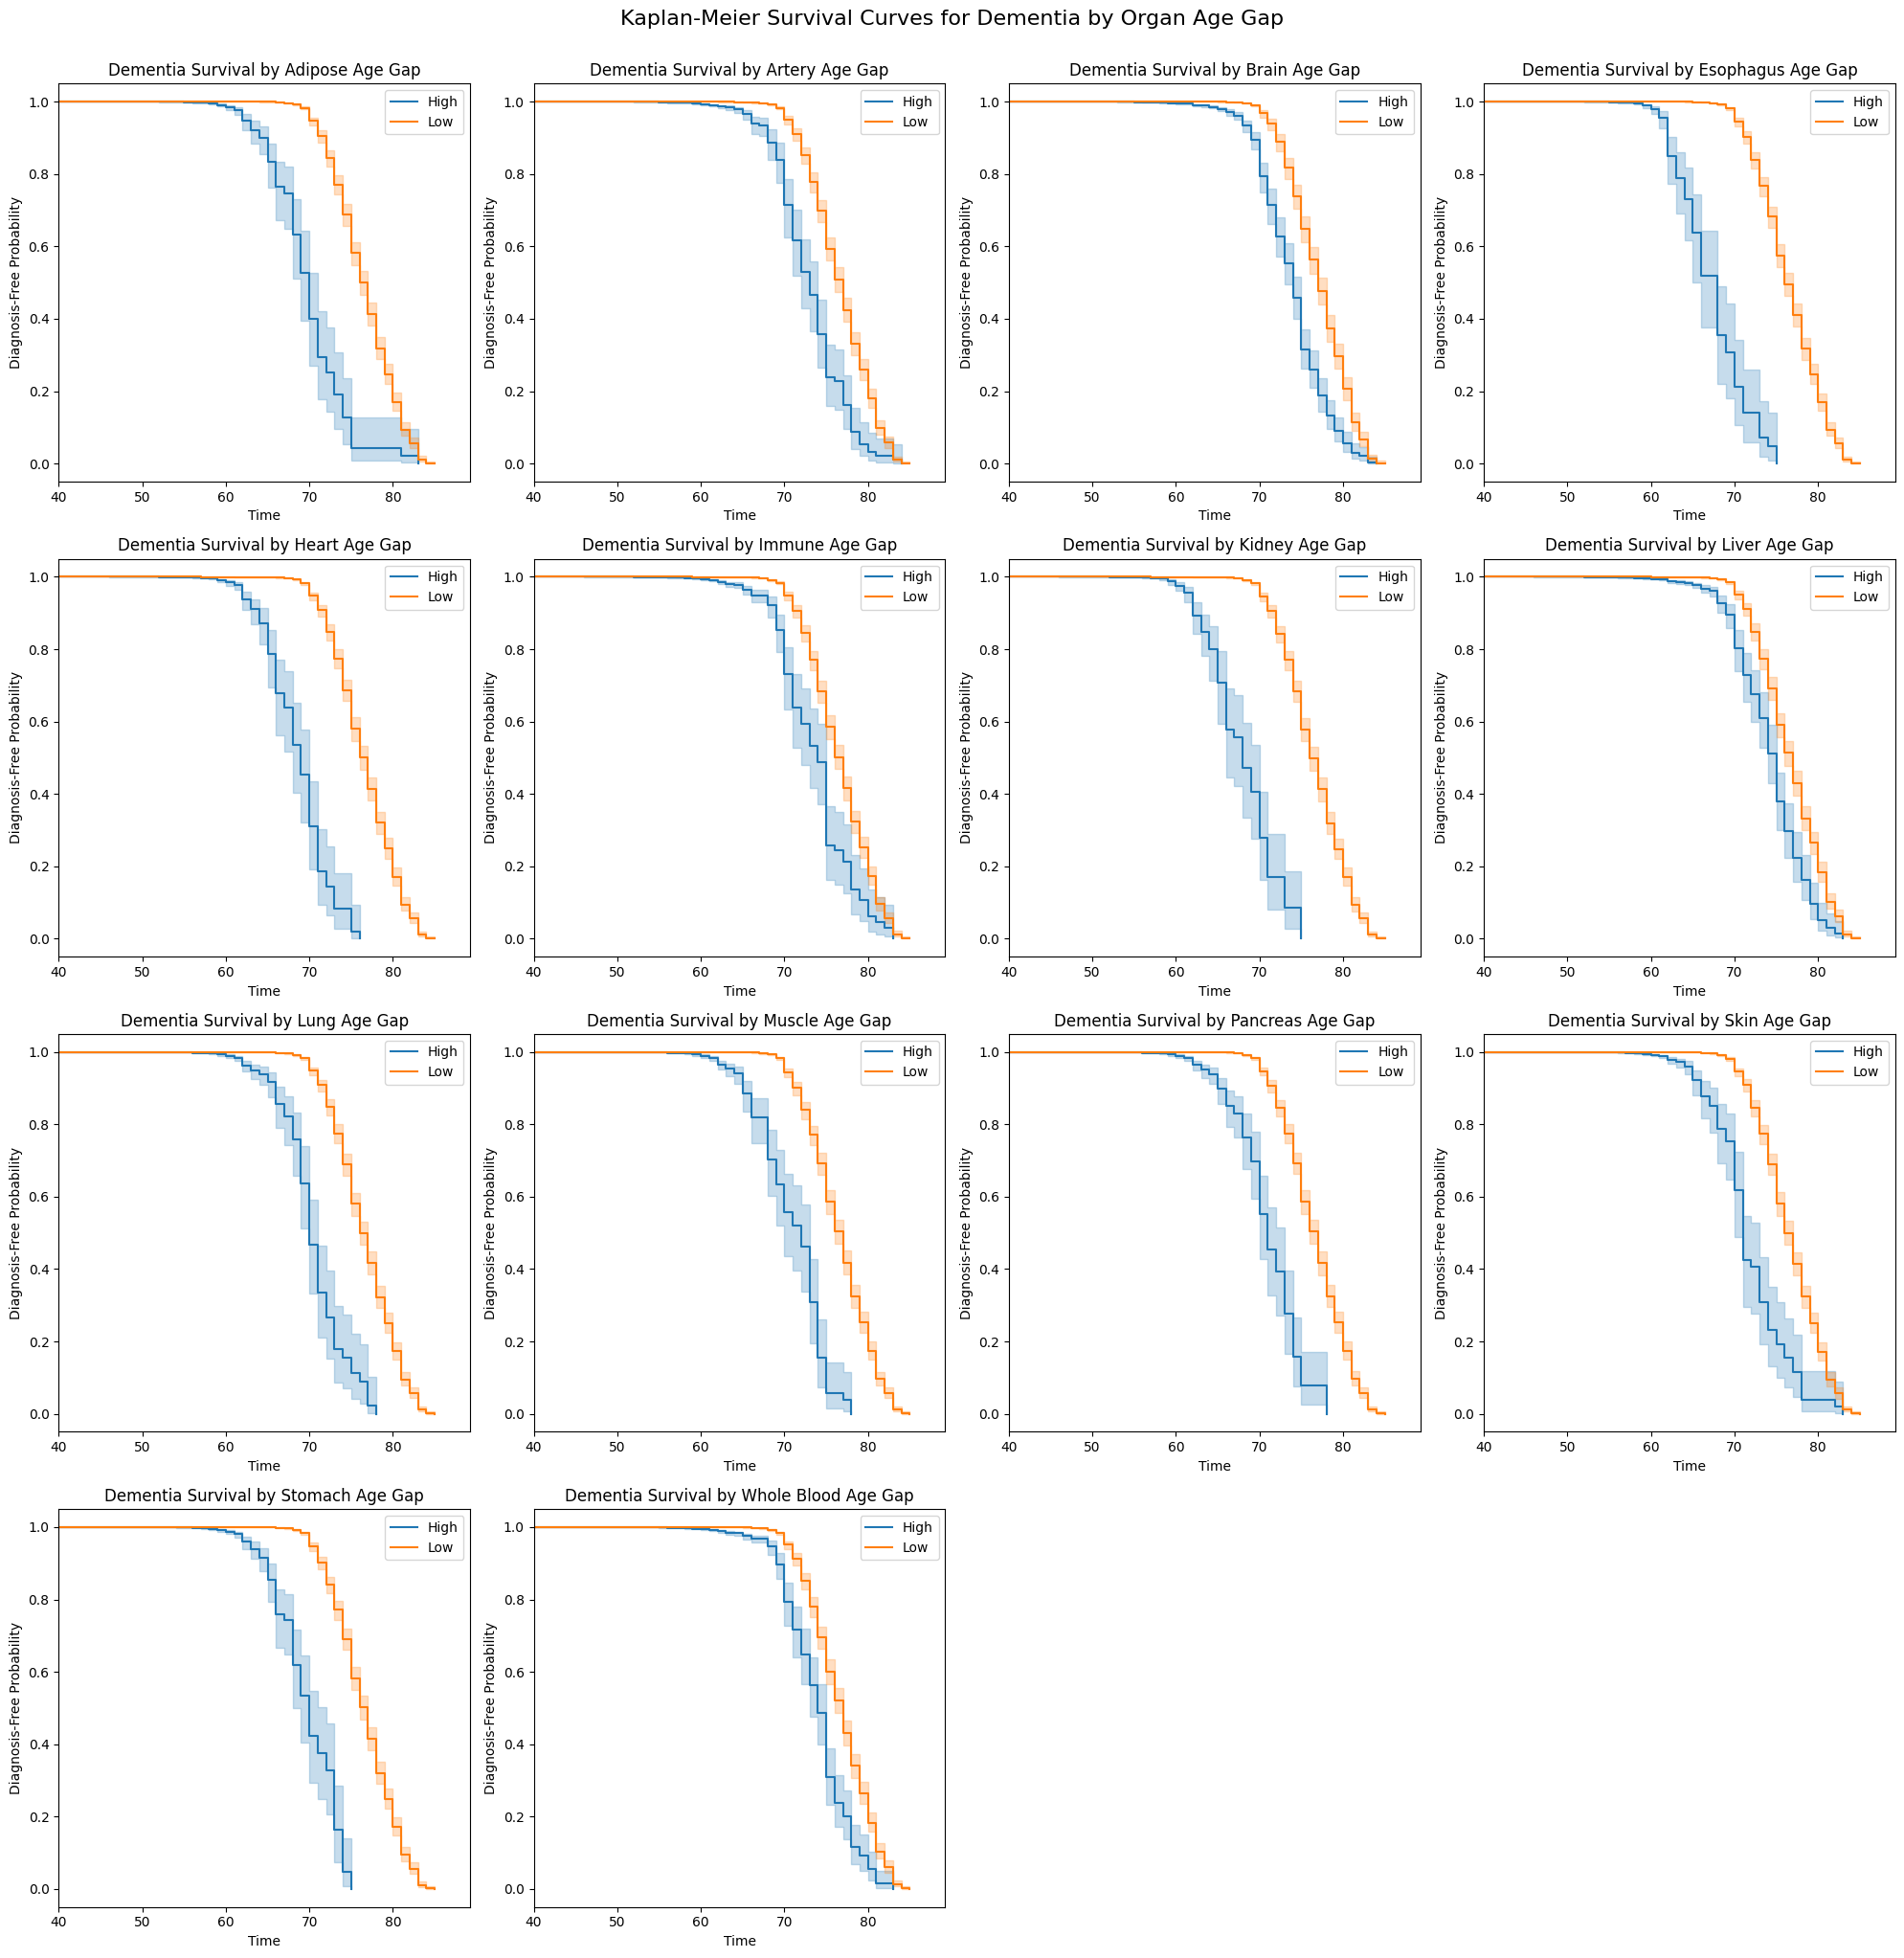

In [114]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_dementia = df_merged[df_merged['disease_group'].isin(['dementia', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_dementia[organ].median()
    df_dementia['organ_group'] = df_dementia[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_dementia['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_dementia[mask]['event_time'], df_dementia[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'Dementia Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')
    ax.set_xlim(left=40)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for Dementia by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("Dementia_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

In [79]:
organ_cols = ['Adipose', 'Artery', 'Brain', 'Esophagus', 'Heart', 'Immune', 'Kidney',
    'Liver', 'Lung', 'Muscle', 'Pancreas', 'Skin', 'Stomach', 'Whole Blood']  # <-- update this!

results = []

for organ in organ_cols:
    df_temp = df_dementia[['event_time', 'event_observed', organ]].dropna()
    df_temp = df_temp.rename(columns={organ: 'OrganAgeGap'})
    
    cph = CoxPHFitter()
    cph.fit(df_temp, duration_col='event_time', event_col='event_observed')
    
    summary = cph.summary
    summary['organ'] = organ
    results.append(summary)

# Combine all summaries
all_results_df_dementia = pd.concat(results)

# Reorder columns for clarity
all_results_df_dementia = all_results_df_dementia.reset_index(drop=True)
cols_order = ['organ', 'coef', 'exp(coef)', 'se(coef)', 'p', 'exp(coef) lower 95%', 'exp(coef) upper 95%']
all_results_df_dementia = all_results_df_dementia[cols_order]

all_results_df_dementia

,organ,coef,exp(coef),se(coef),p,exp(coef) lower 95%,exp(coef) upper 95%
0,Adipose,0.223707,1.250704,0.007970,2.356954e-173,1.231319,1.270395
1,Artery,0.132487,1.141664,0.007362,2.058699e-72,1.125310,1.158256
2,Brain,0.137516,1.147420,0.007373,1.214706e-77,1.130959,1.164121
3,Esophagus,0.302147,1.352761,0.009740,2.672213e-211,1.327182,1.378832
4,Heart,0.269256,1.308991,0.009655,3.630137e-171,1.284454,1.333996
5,Immune,0.111625,1.118093,0.007472,1.830790e-50,1.101838,1.134588
6,Kidney,0.327635,1.387683,0.009569,5.954248e-257,1.361901,1.413953
7,Liver,0.090804,1.095054,0.006707,9.271877e-42,1.080753,1.109544
8,Lung,0.193270,1.213211,0.008852,1.098369e-105,1.192344,1.234442
9,Muscle,0.199650,1.220975,0.008452,2.324226e-123,1.200915,1.241370


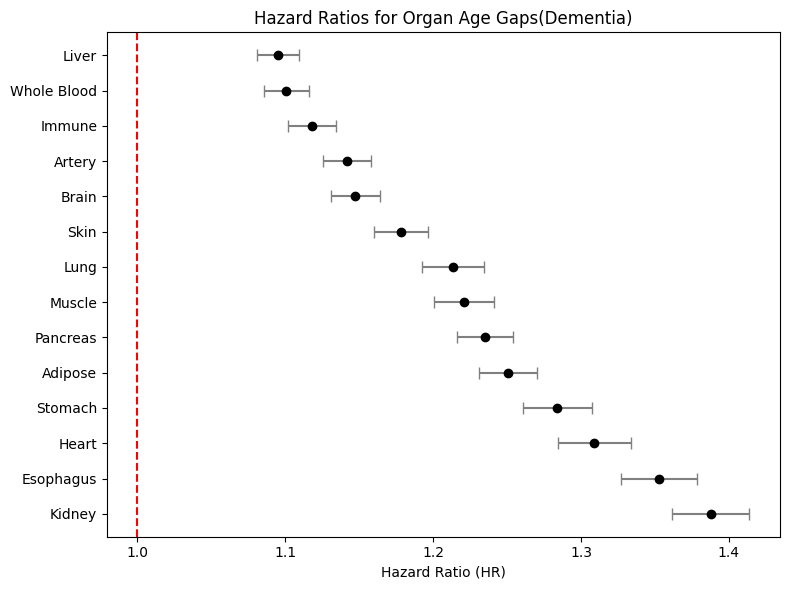

In [80]:
all_results_df_sorted = all_results_df_dementia.sort_values(by='exp(coef)', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
organs = all_results_df_sorted['organ']
hr = all_results_df_sorted['exp(coef)']
lower_ci = all_results_df_sorted['exp(coef) lower 95%']
upper_ci = all_results_df_sorted['exp(coef) upper 95%']

# Plot horizontal lines for confidence intervals
ax.errorbar(hr, organs, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Add a vertical line at HR = 1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

ax.set_xlabel('Hazard Ratio (HR)')
ax.set_title('Hazard Ratios for Organ Age Gaps(Dementia)')
plt.tight_layout()
plt.savefig("HR_age_gap_Demenntia", dpi=300, bbox_inches='tight')
plt.show()

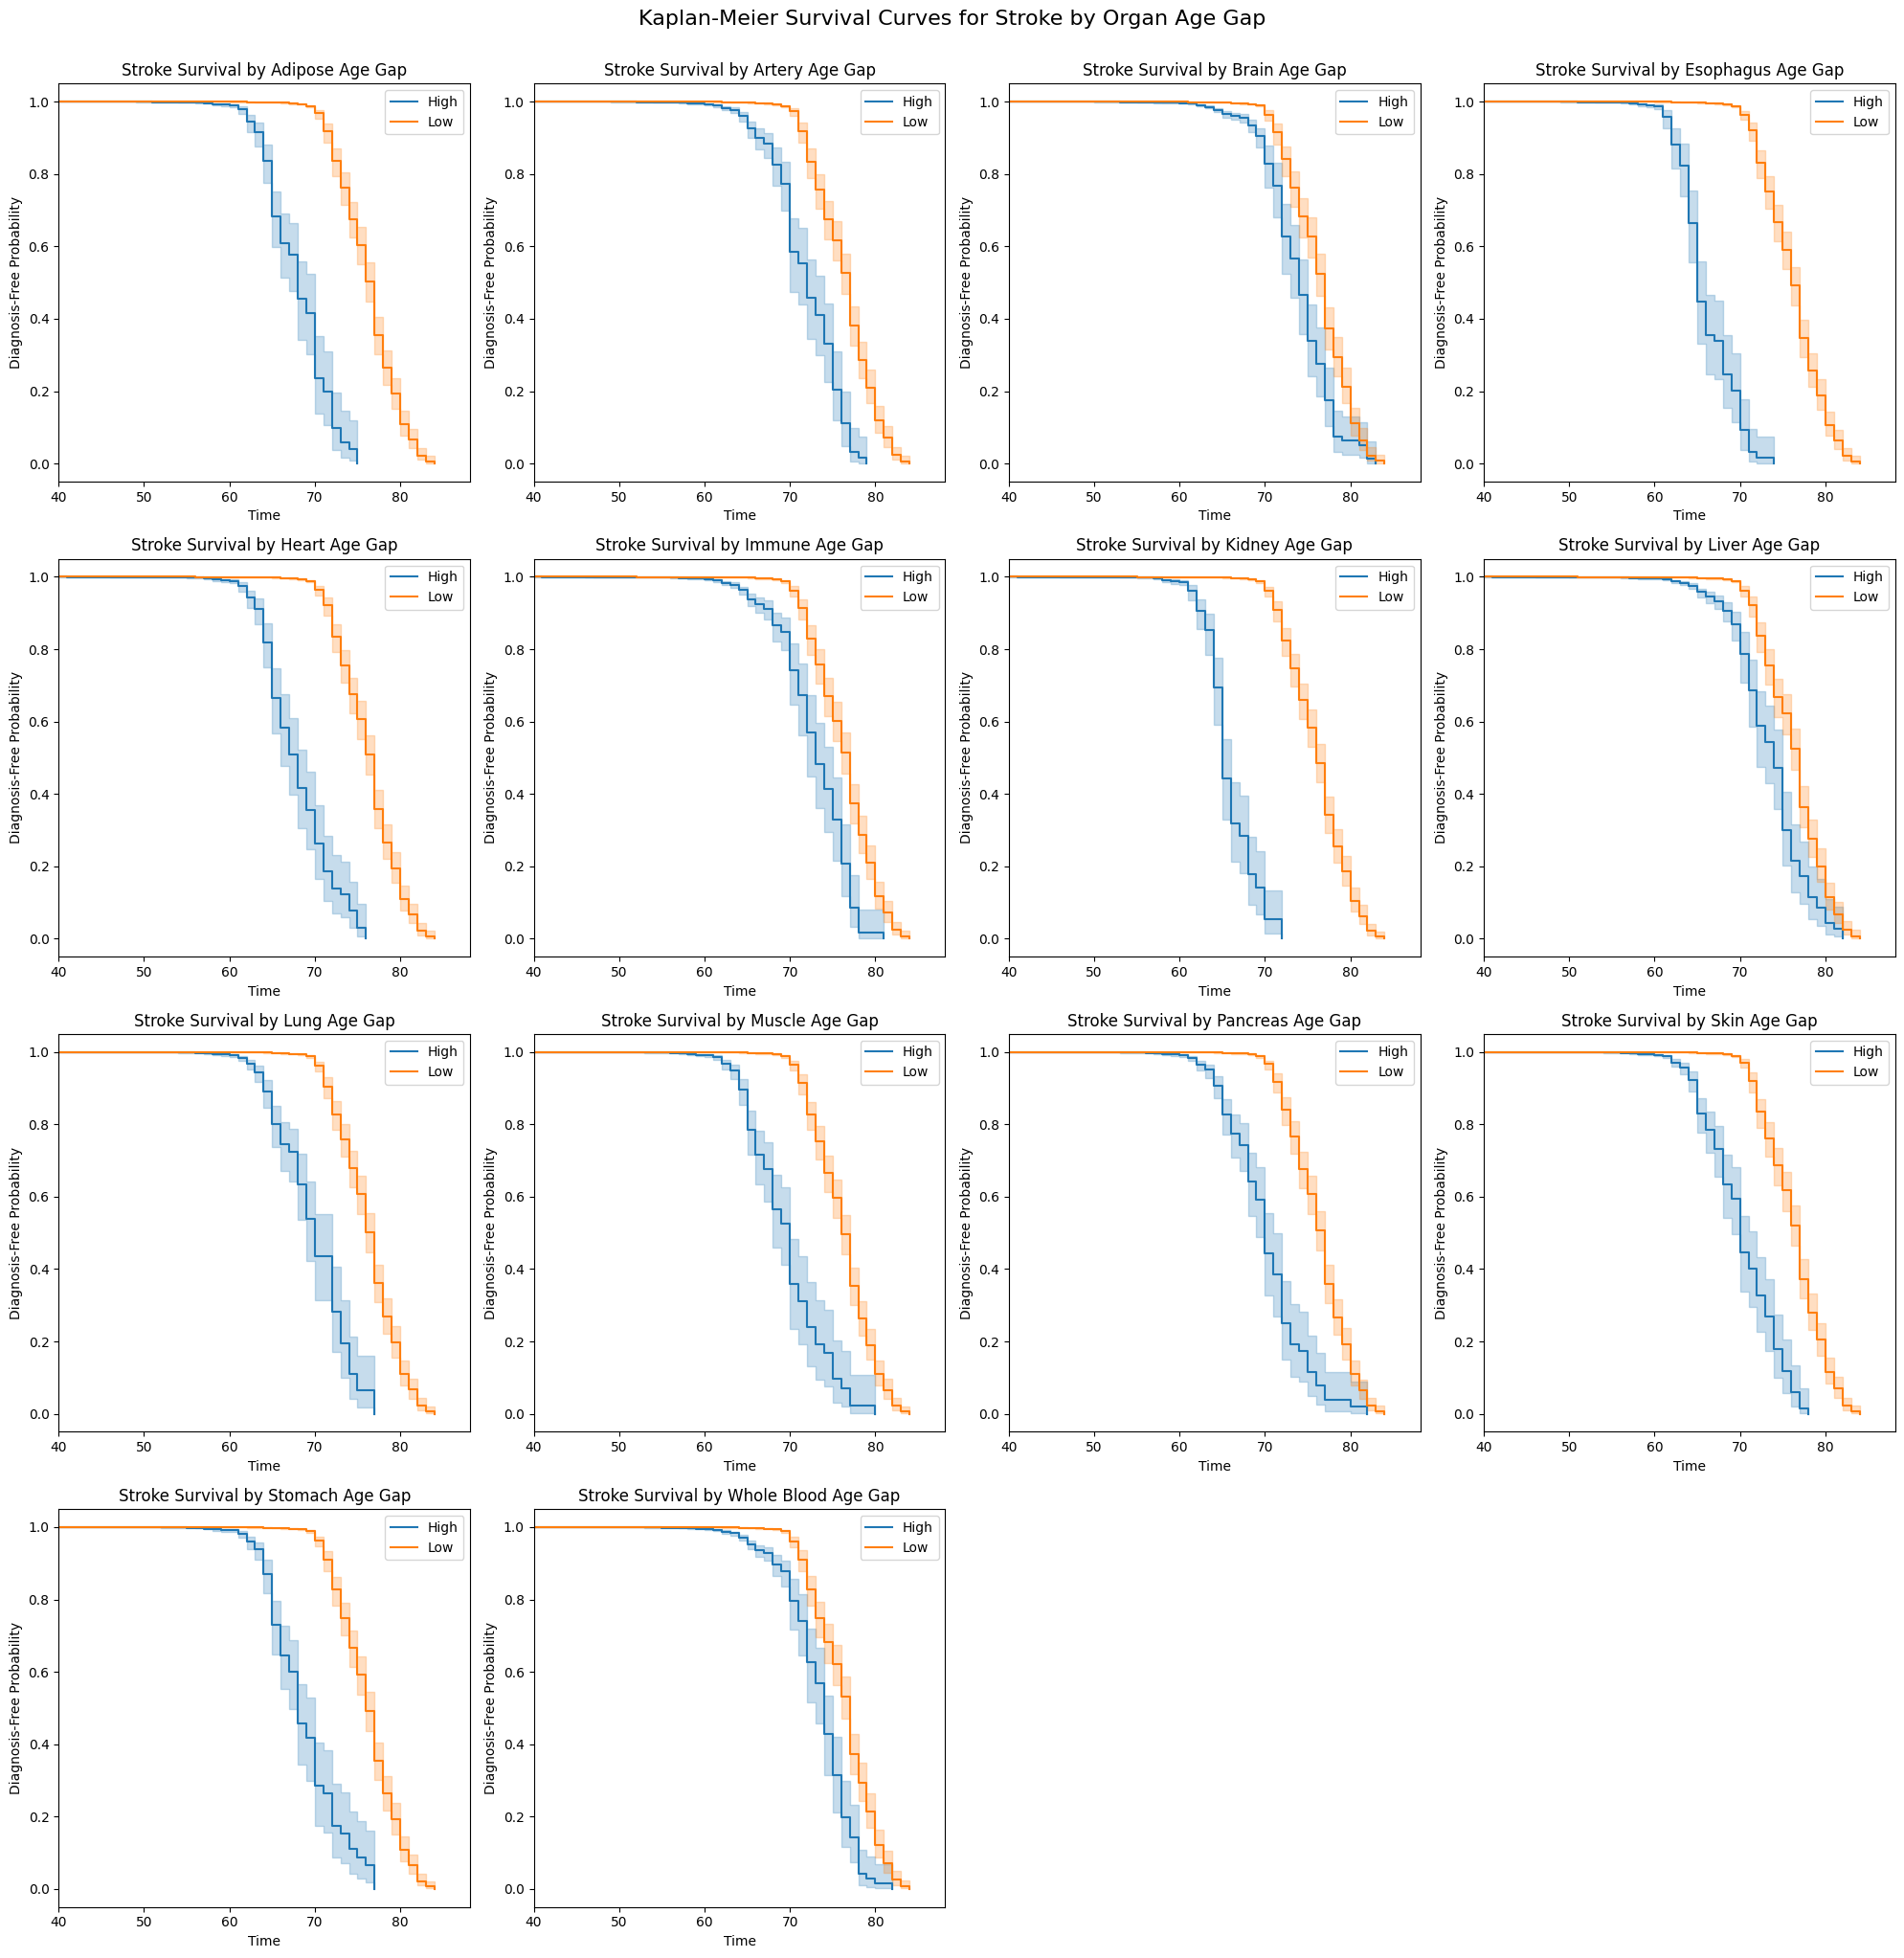

In [115]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_stroke = df_merged[df_merged['disease_group'].isin(['stroke', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_stroke[organ].median()
    df_stroke['organ_group'] = df_stroke[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_stroke['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_stroke[mask]['event_time'], df_stroke[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'Stroke Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')
    ax.set_xlim(left=40)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for Stroke by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("Stroke_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

In [81]:
organ_cols = ['Adipose', 'Artery', 'Brain', 'Esophagus', 'Heart', 'Immune', 'Kidney',
    'Liver', 'Lung', 'Muscle', 'Pancreas', 'Skin', 'Stomach', 'Whole Blood'] 

results = []

for organ in organ_cols:
    df_temp = df_stroke[['event_time', 'event_observed', organ]].dropna()
    df_temp = df_temp.rename(columns={organ: 'OrganAgeGap'})
    
    cph = CoxPHFitter()
    cph.fit(df_temp, duration_col='event_time', event_col='event_observed')
    
    summary = cph.summary
    summary['organ'] = organ
    results.append(summary)

# Combine all summaries
all_results_df_stroke = pd.concat(results)

# Reorder columns for clarity
all_results_df_stroke = all_results_df_stroke.reset_index(drop=True)
cols_order = ['organ', 'coef', 'exp(coef)', 'se(coef)', 'p', 'exp(coef) lower 95%', 'exp(coef) upper 95%']
all_results_df_stroke = all_results_df_stroke[cols_order]

all_results_df_stroke

,organ,coef,exp(coef),se(coef),p,exp(coef) lower 95%,exp(coef) upper 95%
0,Adipose,0.347576,1.415632,0.011453,2.587846e-202,1.384209,1.447767
1,Artery,0.187332,1.206028,0.008711,1.362316e-102,1.185613,1.226794
2,Brain,0.167655,1.182529,0.009991,3.394677e-63,1.159597,1.205913
3,Esophagus,0.431335,1.539311,0.012524,6.495518e-260,1.501985,1.577565
4,Heart,0.331015,1.392381,0.011254,3.806369e-190,1.362004,1.423435
5,Immune,0.200032,1.221442,0.010151,1.957844e-86,1.197380,1.245988
6,Kidney,0.427154,1.532888,0.012225,1.723179e-267,1.496597,1.570060
7,Liver,0.132389,1.141552,0.008960,2.104778e-49,1.121680,1.161776
8,Lung,0.283955,1.328373,0.011135,1.922660e-143,1.299696,1.357682
9,Muscle,0.256010,1.291765,0.009375,3.326008e-164,1.268247,1.315719


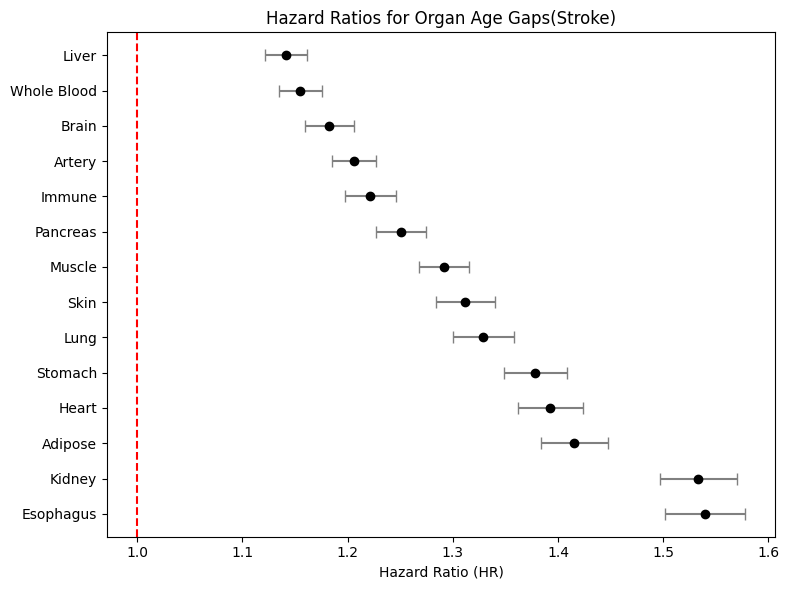

In [82]:
all_results_df_sorted = all_results_df_stroke.sort_values(by='exp(coef)', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
organs = all_results_df_sorted['organ']
hr = all_results_df_sorted['exp(coef)']
lower_ci = all_results_df_sorted['exp(coef) lower 95%']
upper_ci = all_results_df_sorted['exp(coef) upper 95%']

# Plot horizontal lines for confidence intervals
ax.errorbar(hr, organs, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Add a vertical line at HR = 1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

ax.set_xlabel('Hazard Ratio (HR)')
ax.set_title('Hazard Ratios for Organ Age Gaps(Stroke)')
plt.tight_layout()
plt.savefig("HR_age_gap_Stroke", dpi=300, bbox_inches='tight')
plt.show()

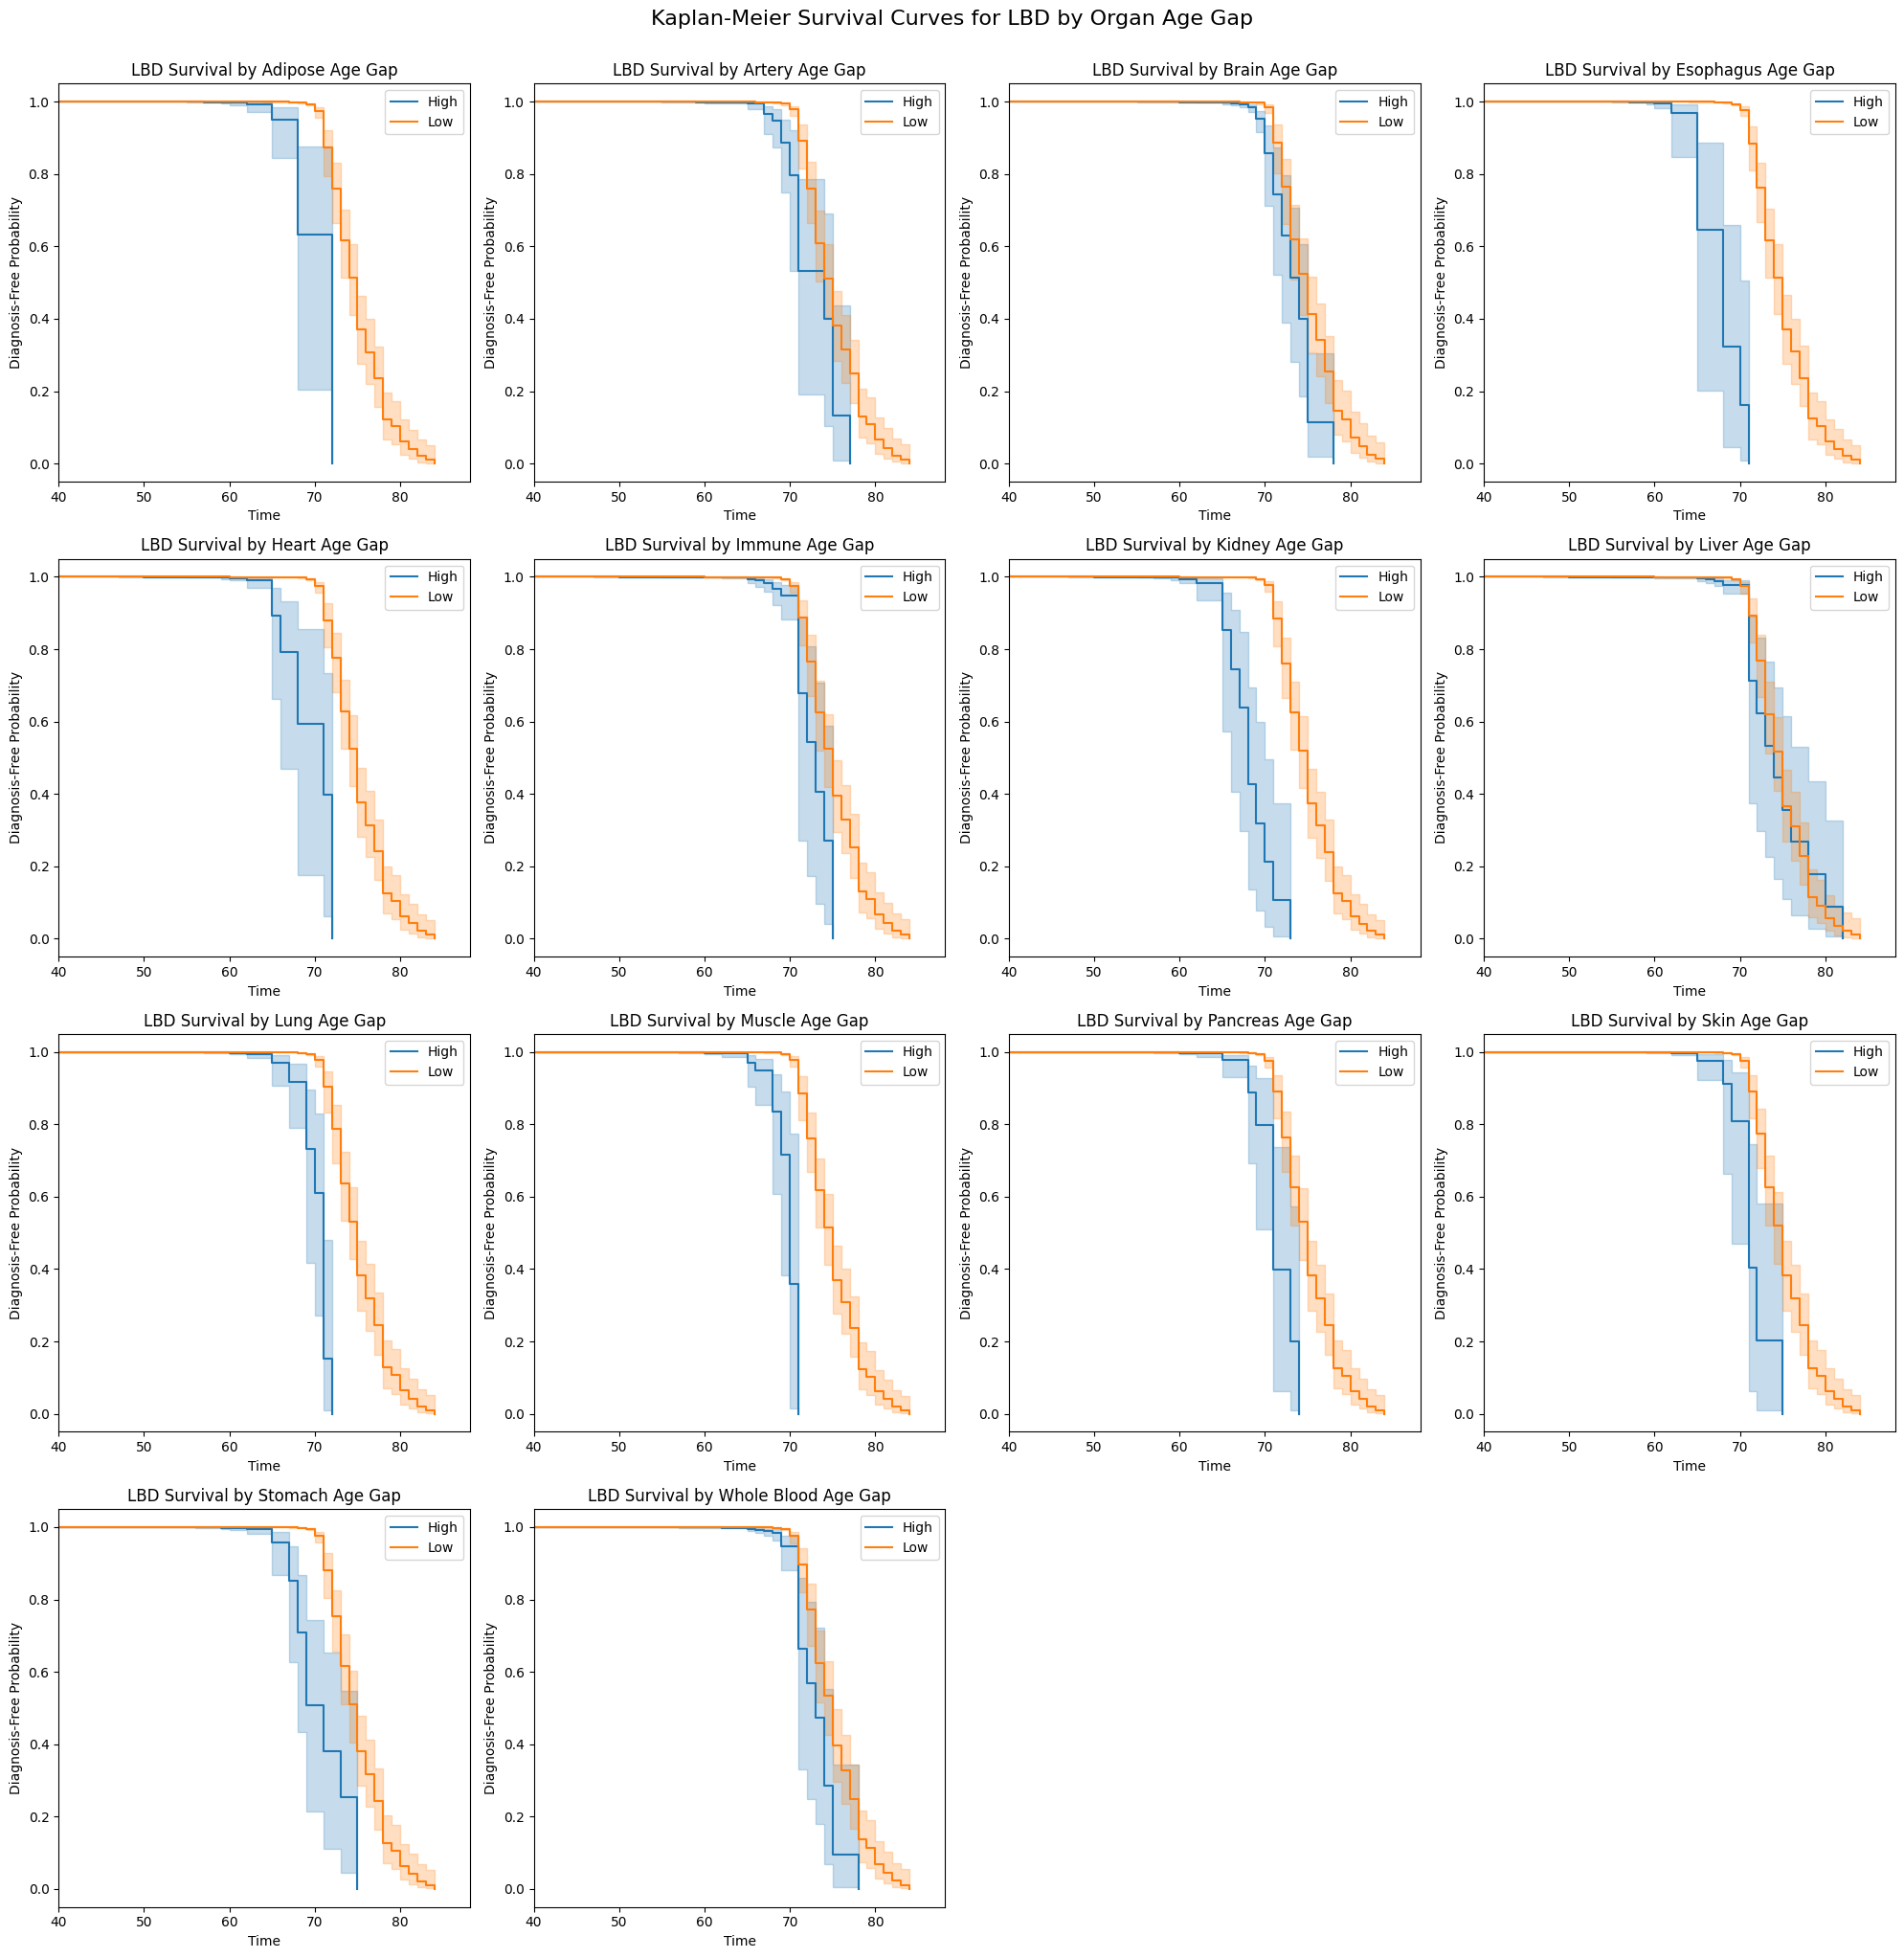

In [116]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_LBD = df_merged[df_merged['disease_group'].isin(['lbd', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_LBD[organ].median()
    df_LBD['organ_group'] = df_LBD[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_LBD['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_LBD[mask]['event_time'], df_LBD[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'LBD Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')
    ax.set_xlim(left=40)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for LBD by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("LBD_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

In [83]:
organ_cols = ['Adipose', 'Artery', 'Brain', 'Esophagus', 'Heart', 'Immune', 'Kidney',
    'Liver', 'Lung', 'Muscle', 'Pancreas', 'Skin', 'Stomach', 'Whole Blood'] 

results = []

for organ in organ_cols:
    df_temp = df_LBD[['event_time', 'event_observed', organ]].dropna()
    df_temp = df_temp.rename(columns={organ: 'OrganAgeGap'})
    
    cph = CoxPHFitter()
    cph.fit(df_temp, duration_col='event_time', event_col='event_observed')
    
    summary = cph.summary
    summary['organ'] = organ
    results.append(summary)

# Combine all summaries
all_results_df_LBD = pd.concat(results)

# Reorder columns for clarity
all_results_df_LBD = all_results_df_LBD.reset_index(drop=True)
cols_order = ['organ', 'coef', 'exp(coef)', 'se(coef)', 'p', 'exp(coef) lower 95%', 'exp(coef) upper 95%']
all_results_df_LBD = all_results_df_LBD[cols_order]

all_results_df_LBD

,organ,coef,exp(coef),se(coef),p,exp(coef) lower 95%,exp(coef) upper 95%
0,Adipose,0.392255,1.480314,0.026524,1.732308e-49,1.405325,1.559305
1,Artery,0.147029,1.158388,0.018314,9.874813e-16,1.117546,1.200723
2,Brain,0.172207,1.187923,0.022223,9.249700e-15,1.137293,1.240807
3,Esophagus,0.341415,1.406937,0.026530,6.727625e-38,1.335649,1.482031
4,Heart,0.319273,1.376127,0.027030,3.392523e-32,1.305120,1.450997
5,Immune,0.122947,1.130824,0.020186,1.125100e-09,1.086957,1.176462
6,Kidney,0.361180,1.435021,0.023500,2.617054e-53,1.370426,1.502662
7,Liver,0.060478,1.062344,0.016288,2.047271e-04,1.028966,1.096805
8,Lung,0.259776,1.296640,0.025880,1.042423e-23,1.232508,1.364108
9,Muscle,0.245816,1.278665,0.024436,8.345522e-24,1.218867,1.341396


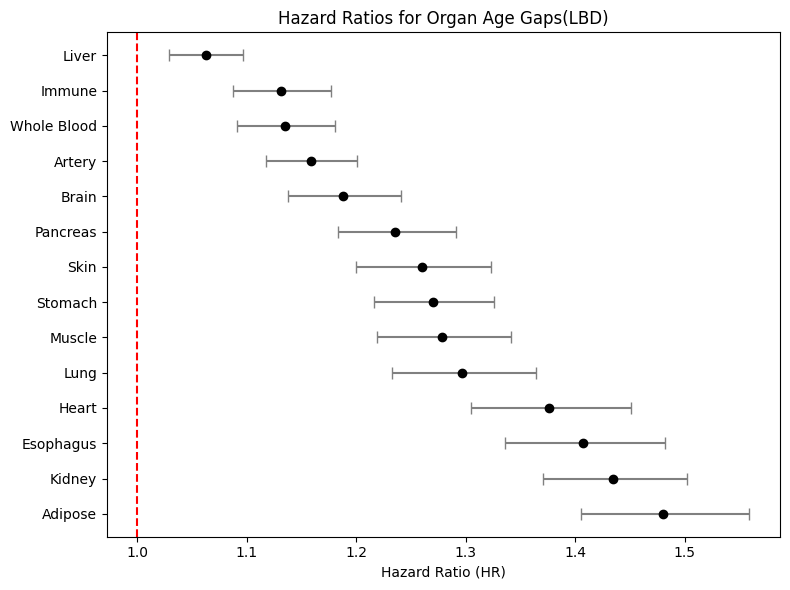

In [84]:
all_results_df_sorted = all_results_df_LBD.sort_values(by='exp(coef)', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
organs = all_results_df_sorted['organ']
hr = all_results_df_sorted['exp(coef)']
lower_ci = all_results_df_sorted['exp(coef) lower 95%']
upper_ci = all_results_df_sorted['exp(coef) upper 95%']

# Plot horizontal lines for confidence intervals
ax.errorbar(hr, organs, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Add a vertical line at HR = 1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

ax.set_xlabel('Hazard Ratio (HR)')
ax.set_title('Hazard Ratios for Organ Age Gaps(LBD)')
plt.tight_layout()
plt.savefig("HR_age_gap_LBD", dpi=300, bbox_inches='tight')
plt.show()

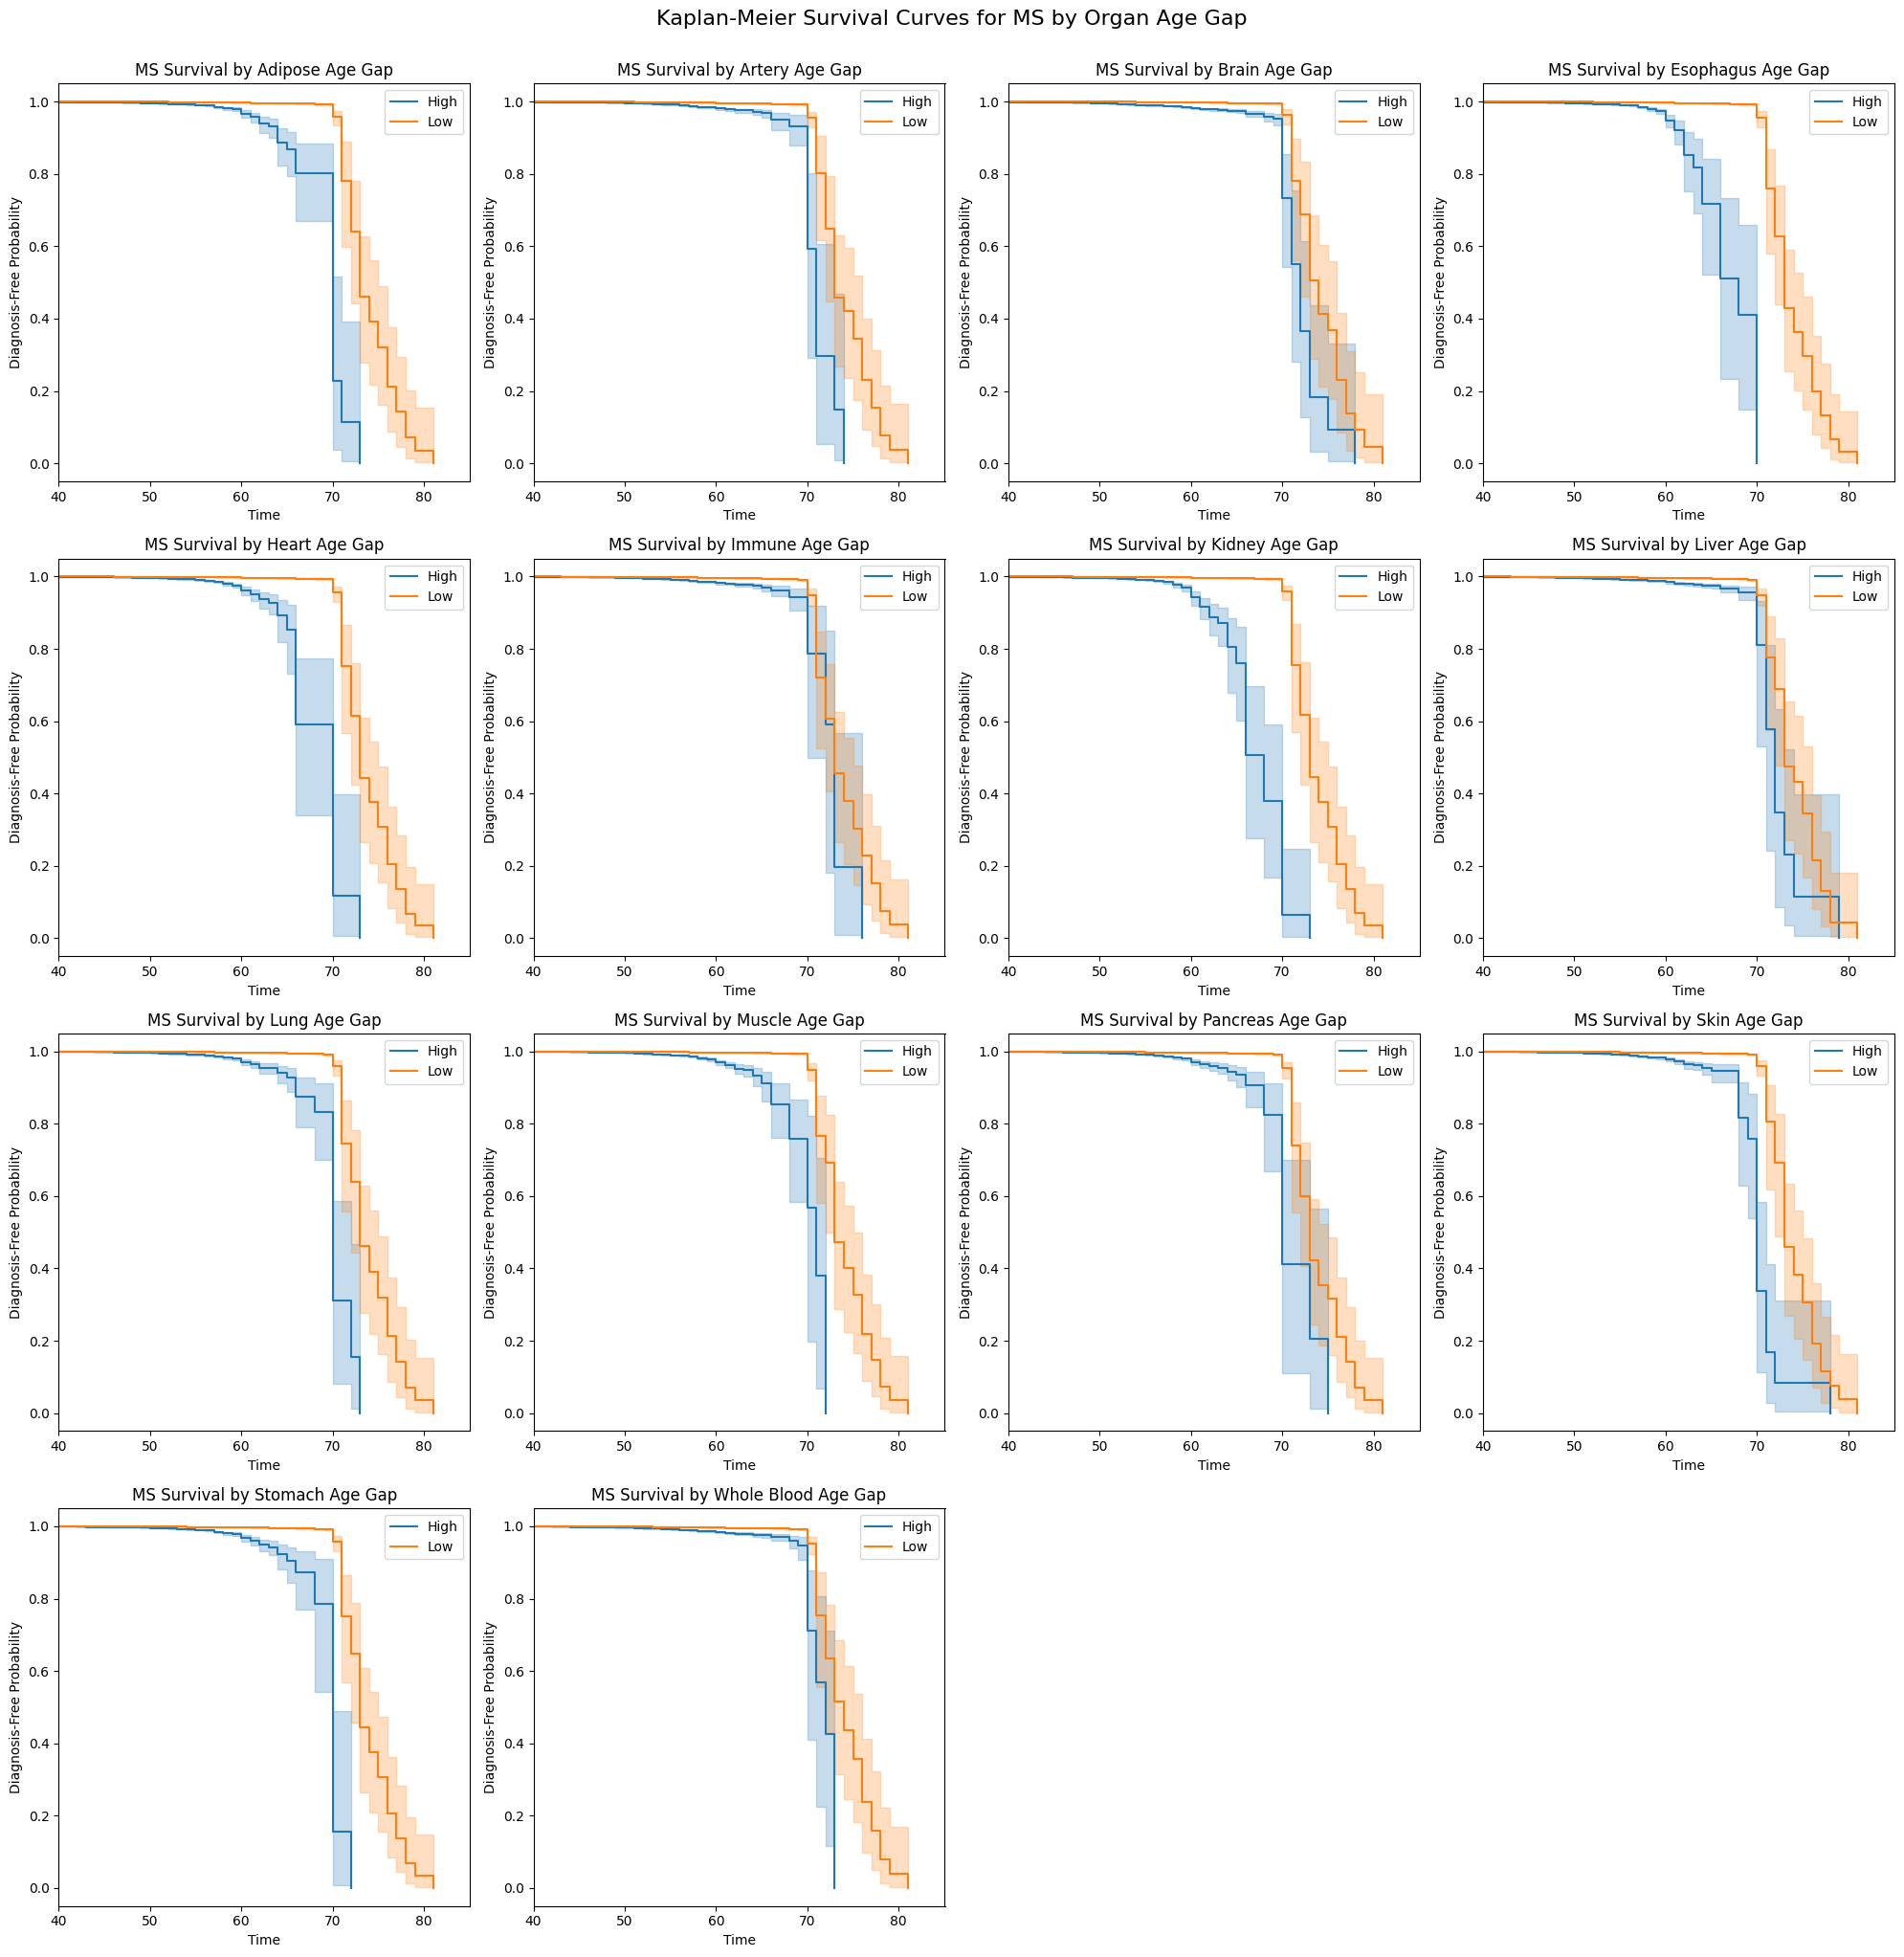

In [117]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_MS = df_merged[df_merged['disease_group'].isin(['ms', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_MS[organ].median()
    df_MS['organ_group'] = df_MS[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_MS['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_MS[mask]['event_time'], df_MS[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'MS Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')
    ax.set_xlim(left=40)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for MS by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("MS_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

In [85]:
organ_cols = ['Adipose', 'Artery', 'Brain', 'Esophagus', 'Heart', 'Immune', 'Kidney',
    'Liver', 'Lung', 'Muscle', 'Pancreas', 'Skin', 'Stomach', 'Whole Blood'] 

results = []

for organ in organ_cols:
    df_temp = df_MS[['event_time', 'event_observed', organ]].dropna()
    df_temp = df_temp.rename(columns={organ: 'OrganAgeGap'})
    
    cph = CoxPHFitter()
    cph.fit(df_temp, duration_col='event_time', event_col='event_observed')
    
    summary = cph.summary
    summary['organ'] = organ
    results.append(summary)

# Combine all summaries
all_results_df_MS = pd.concat(results)

# Reorder columns for clarity
all_results_df_MS = all_results_df_MS.reset_index(drop=True)
cols_order = ['organ', 'coef', 'exp(coef)', 'se(coef)', 'p', 'exp(coef) lower 95%', 'exp(coef) upper 95%']
all_results_df_MS = all_results_df_MS[cols_order]

all_results_df_MS

,organ,coef,exp(coef),se(coef),p,exp(coef) lower 95%,exp(coef) upper 95%
0,Adipose,0.287999,1.333756,0.012371,7.097052e-120,1.301805,1.366491
1,Artery,0.183103,1.200938,0.009338,1.309817e-85,1.179158,1.223120
2,Brain,0.237539,1.268125,0.009874,6.869010e-128,1.243820,1.292905
3,Esophagus,0.309250,1.362403,0.014794,4.903012e-97,1.323467,1.402485
4,Heart,0.317294,1.373406,0.014160,3.332402e-111,1.335813,1.412057
5,Immune,0.191946,1.211605,0.010456,2.866404e-75,1.187028,1.236691
6,Kidney,0.355628,1.427076,0.014312,2.683916e-136,1.387602,1.467674
7,Liver,0.159510,1.172936,0.010500,4.061191e-52,1.149043,1.197325
8,Lung,0.268630,1.308171,0.012278,4.187534e-106,1.277065,1.340035
9,Muscle,0.286756,1.332099,0.012065,7.394718e-125,1.300967,1.363976


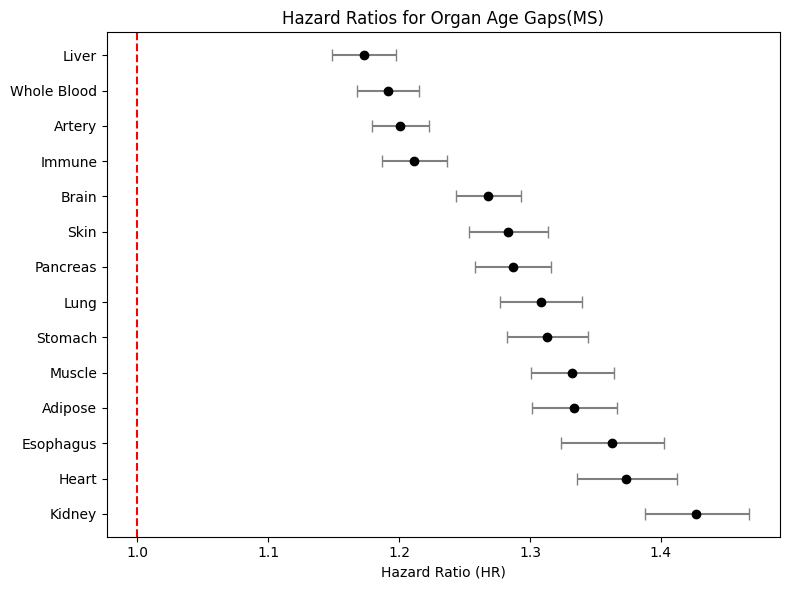

In [86]:
all_results_df_sorted = all_results_df_MS.sort_values(by='exp(coef)', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
organs = all_results_df_sorted['organ']
hr = all_results_df_sorted['exp(coef)']
lower_ci = all_results_df_sorted['exp(coef) lower 95%']
upper_ci = all_results_df_sorted['exp(coef) upper 95%']

# Plot horizontal lines for confidence intervals
ax.errorbar(hr, organs, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Add a vertical line at HR = 1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

ax.set_xlabel('Hazard Ratio (HR)')
ax.set_title('Hazard Ratios for Organ Age Gaps(MS)')
plt.tight_layout()
plt.savefig("HR_age_gap_MS", dpi=300, bbox_inches='tight')
plt.show()

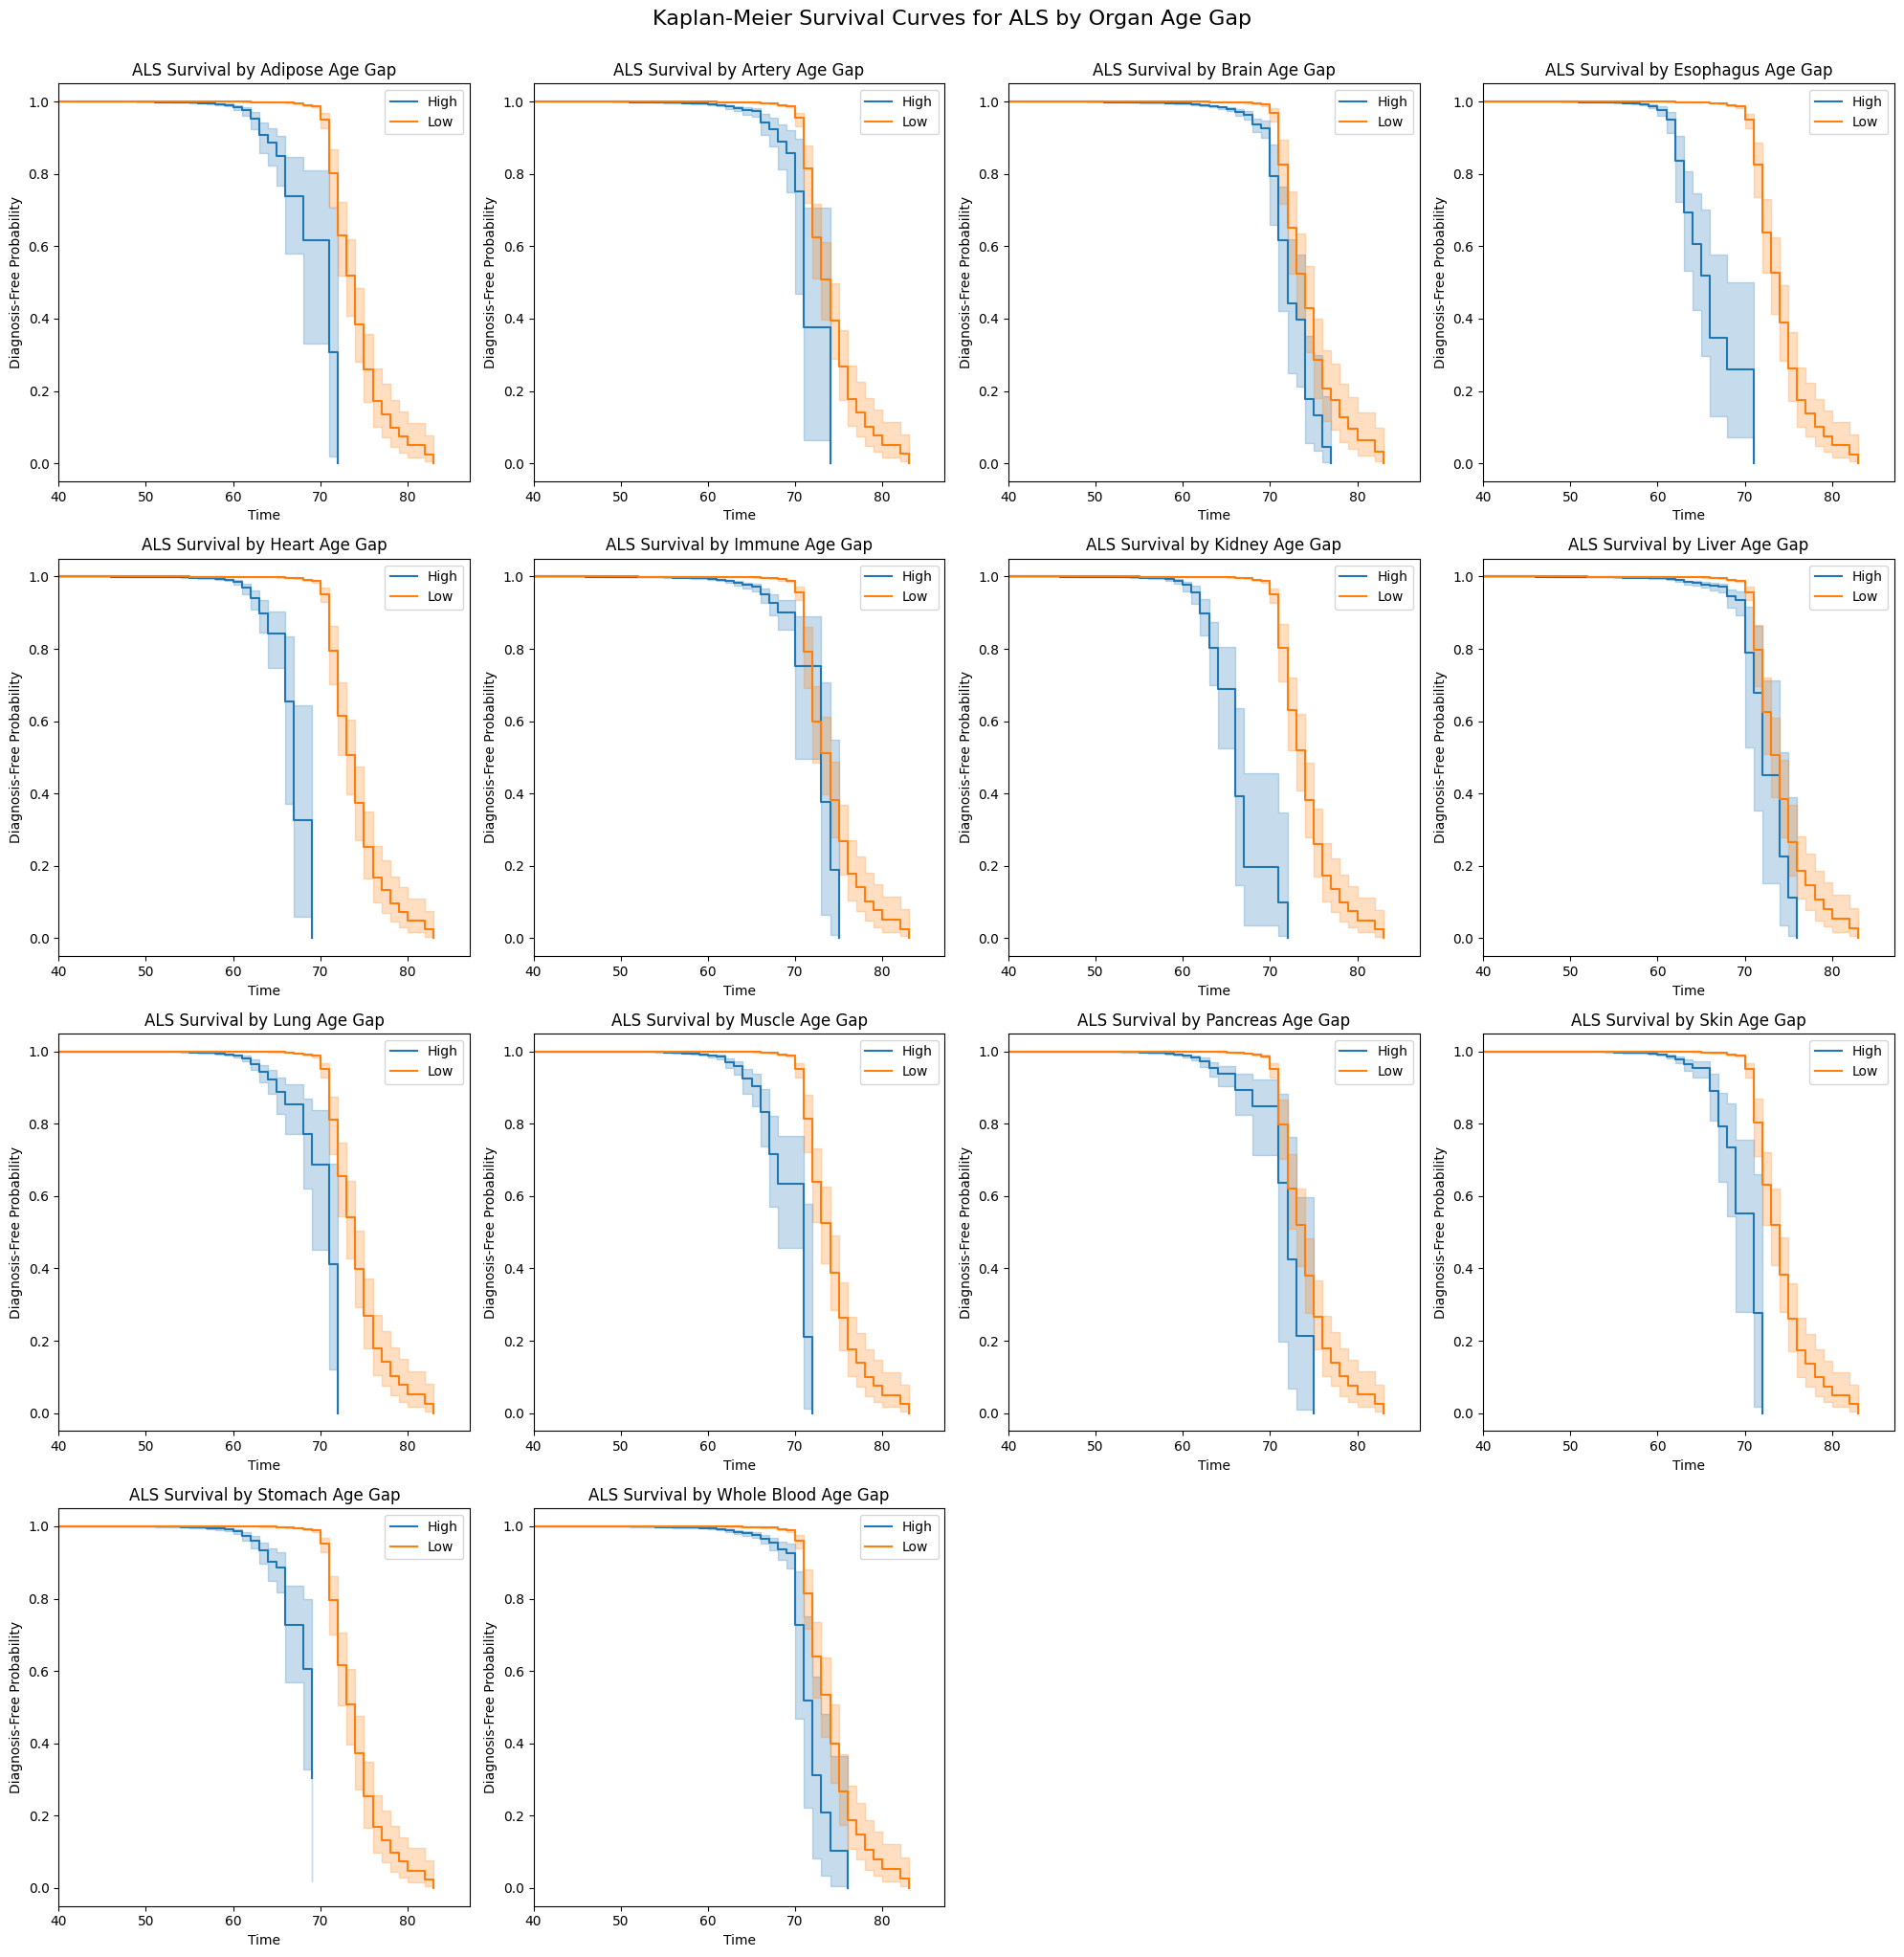

In [118]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_ALS = df_merged[df_merged['disease_group'].isin(['als', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_ALS[organ].median()
    df_ALS['organ_group'] = df_ALS[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_ALS['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_ALS[mask]['event_time'], df_ALS[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'ALS Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')
    ax.set_xlim(left=40)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for ALS by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("ALS_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

In [87]:
organ_cols = ['Adipose', 'Artery', 'Brain', 'Esophagus', 'Heart', 'Immune', 'Kidney',
    'Liver', 'Lung', 'Muscle', 'Pancreas', 'Skin', 'Stomach', 'Whole Blood'] 

results = []

for organ in organ_cols:
    df_temp = df_ALS[['event_time', 'event_observed', organ]].dropna()
    df_temp = df_temp.rename(columns={organ: 'OrganAgeGap'})
    
    cph = CoxPHFitter()
    cph.fit(df_temp, duration_col='event_time', event_col='event_observed')
    
    summary = cph.summary
    summary['organ'] = organ
    results.append(summary)

# Combine all summaries
all_results_df_ALS = pd.concat(results)

# Reorder columns for clarity
all_results_df_ALS = all_results_df_ALS.reset_index(drop=True)
cols_order = ['organ', 'coef', 'exp(coef)', 'se(coef)', 'p', 'exp(coef) lower 95%', 'exp(coef) upper 95%']
all_results_df_ALS = all_results_df_ALS[cols_order]

all_results_df_ALS

,organ,coef,exp(coef),se(coef),p,exp(coef) lower 95%,exp(coef) upper 95%
0,Adipose,0.410363,1.507365,0.015520,4.570161e-154,1.462204,1.553920
1,Artery,0.231943,1.261047,0.012100,6.642820e-82,1.231494,1.291310
2,Brain,0.244541,1.277035,0.013577,1.598053e-72,1.243500,1.311474
3,Esophagus,0.501721,1.651561,0.017616,2.060729e-178,1.595510,1.709582
4,Heart,0.503824,1.655038,0.018520,5.698812e-163,1.596041,1.716216
5,Immune,0.235925,1.266079,0.013695,1.650224e-66,1.232548,1.300522
6,Kidney,0.488903,1.630526,0.017532,3.978901e-171,1.575448,1.687529
7,Liver,0.205914,1.228648,0.014352,1.103044e-46,1.194568,1.263699
8,Lung,0.348315,1.416679,0.015761,3.222590e-108,1.373584,1.461126
9,Muscle,0.385031,1.469660,0.015485,1.782771e-136,1.425726,1.514947


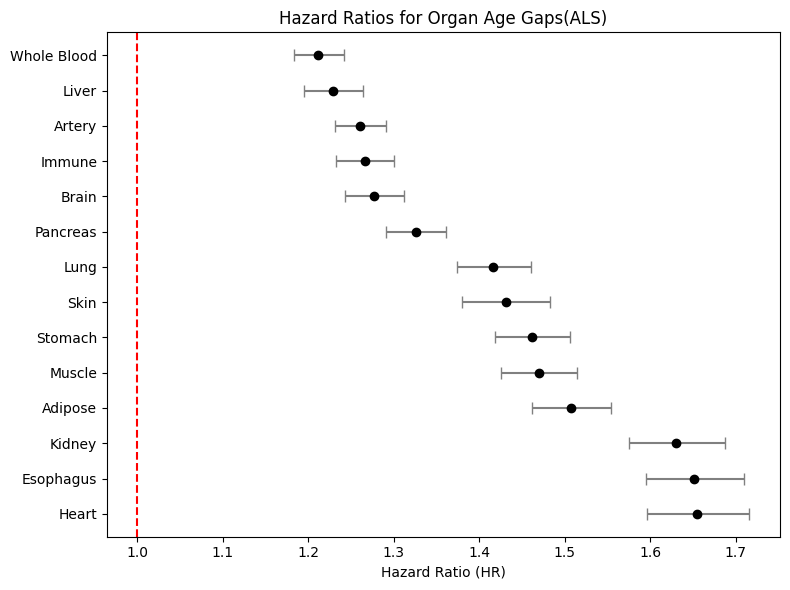

In [88]:
all_results_df_sorted = all_results_df_ALS.sort_values(by='exp(coef)', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
organs = all_results_df_sorted['organ']
hr = all_results_df_sorted['exp(coef)']
lower_ci = all_results_df_sorted['exp(coef) lower 95%']
upper_ci = all_results_df_sorted['exp(coef) upper 95%']

# Plot horizontal lines for confidence intervals
ax.errorbar(hr, organs, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Add a vertical line at HR = 1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

ax.set_xlabel('Hazard Ratio (HR)')
ax.set_title('Hazard Ratios for Organ Age Gaps(ALS)')
plt.tight_layout()
plt.savefig("HR_age_gap_ALS", dpi=300, bbox_inches='tight')
plt.show()

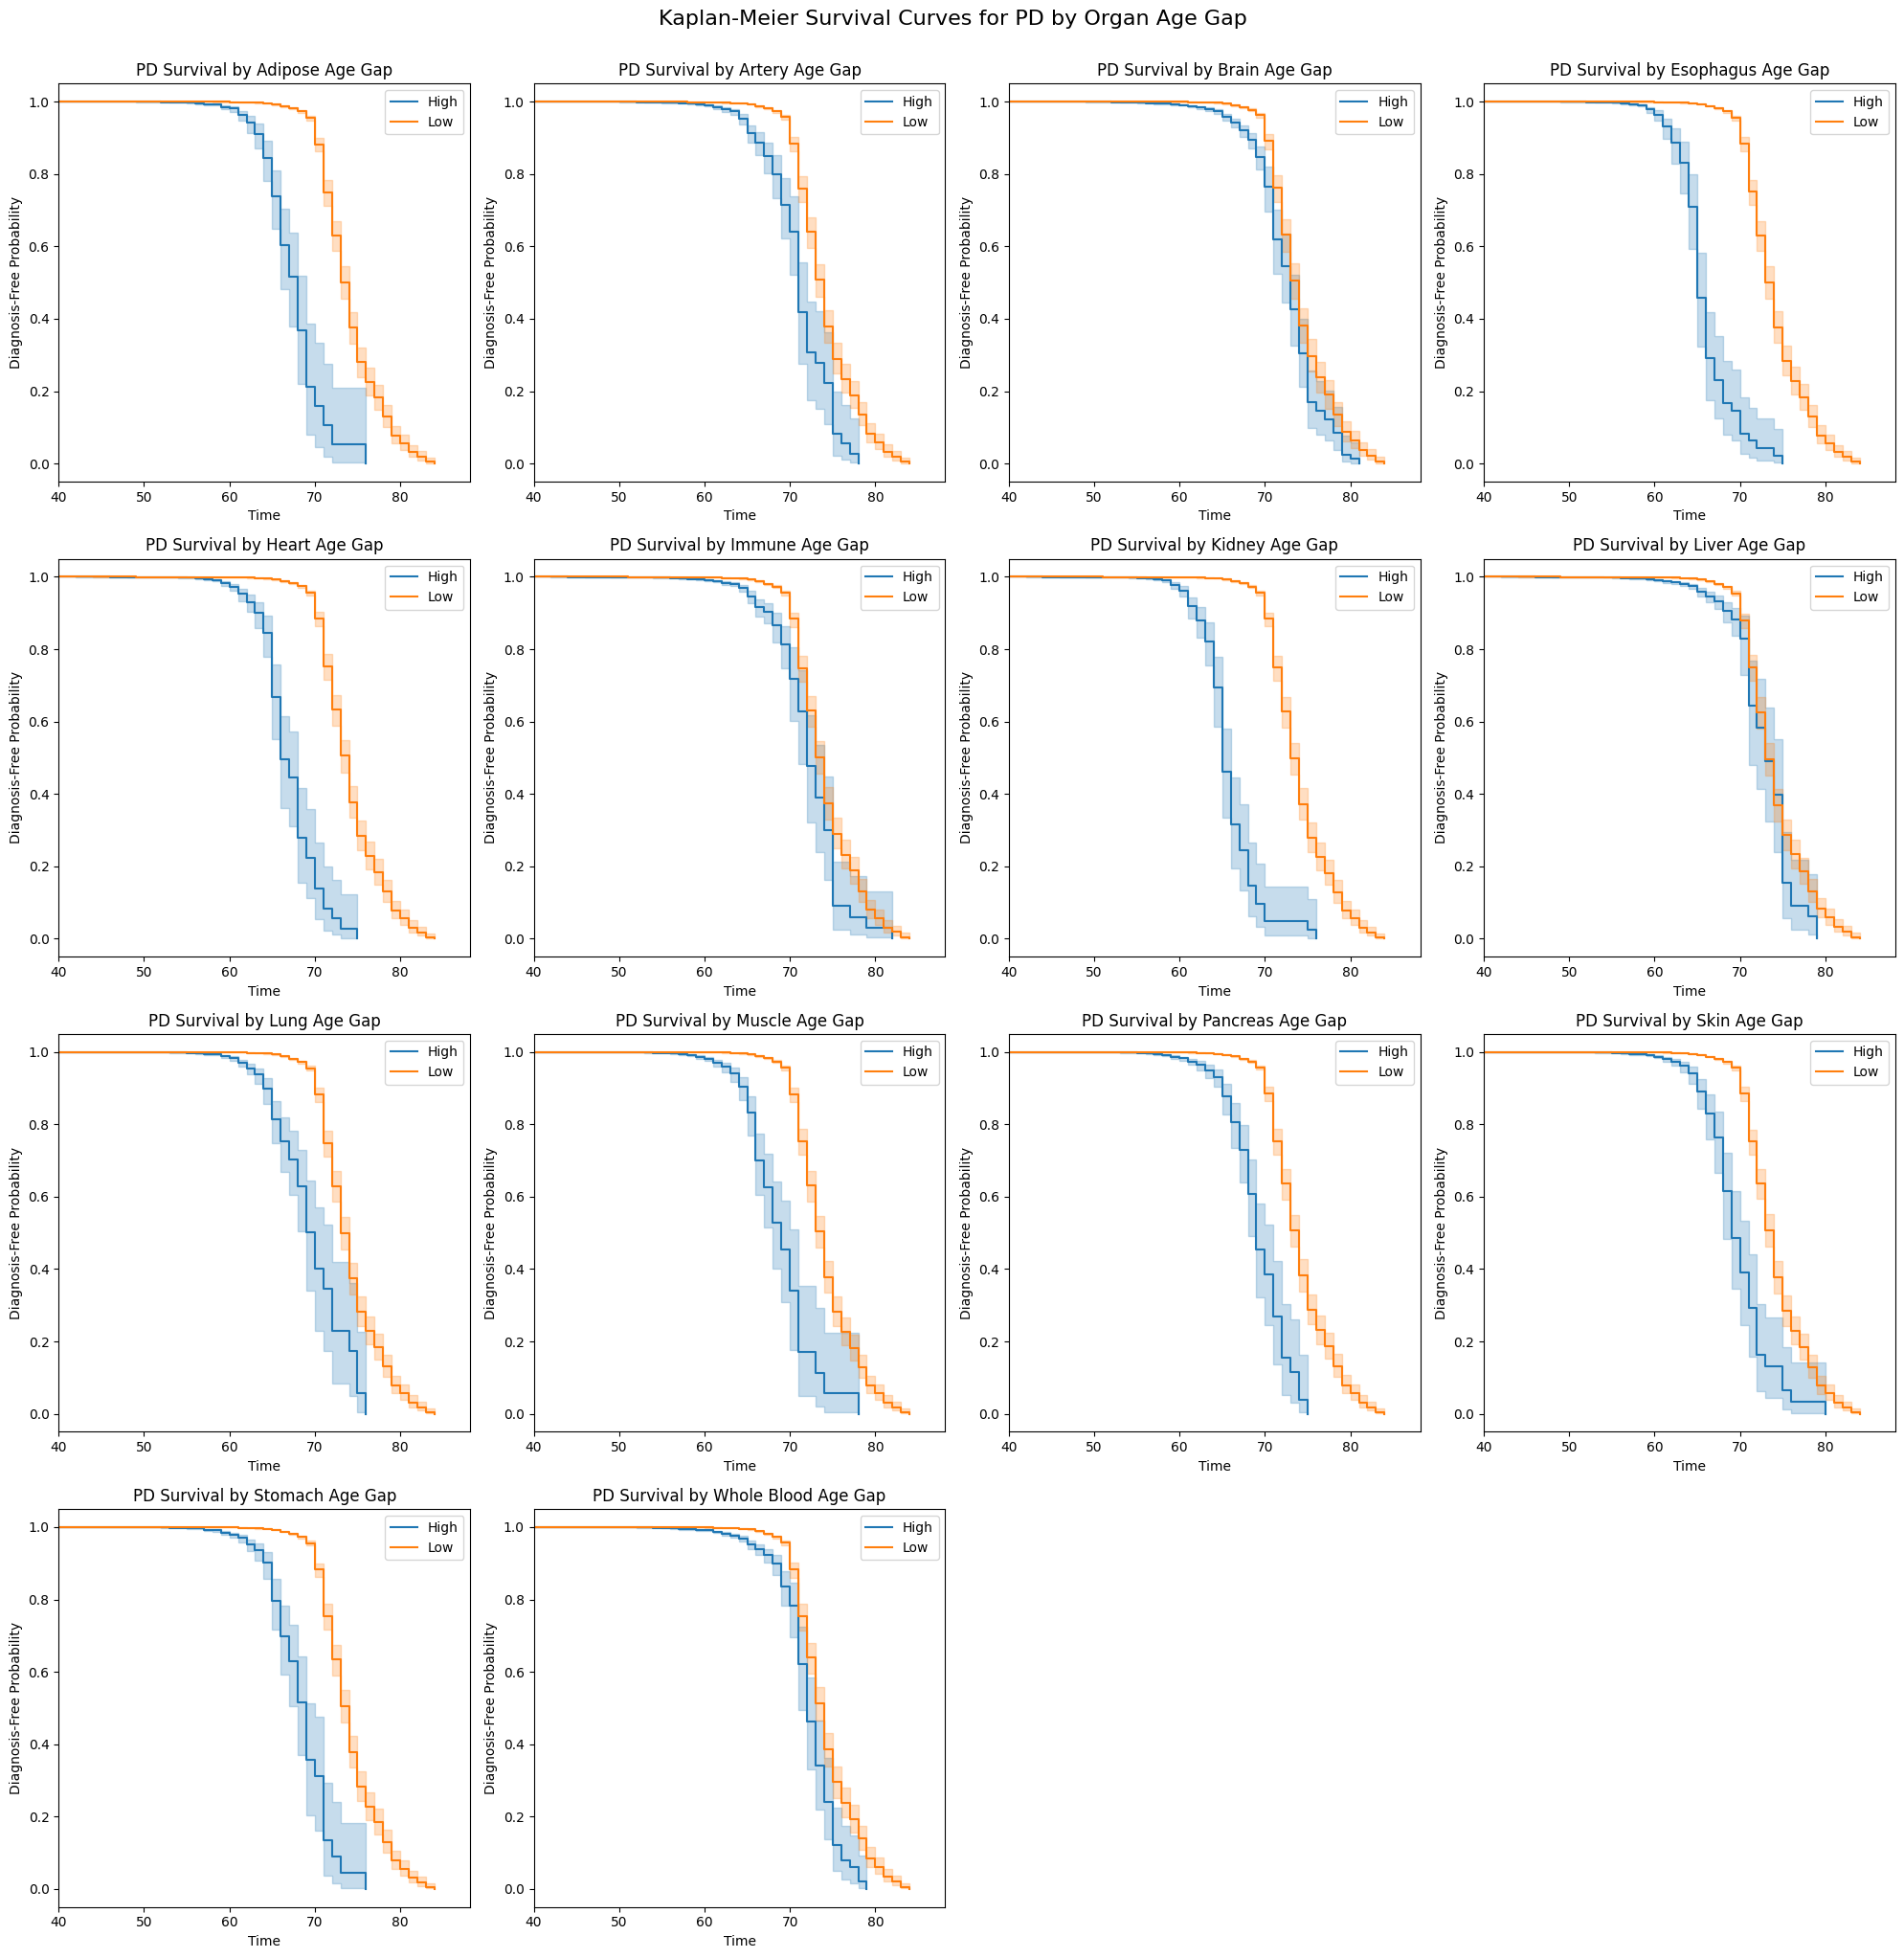

In [119]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_PD = df_merged[df_merged['disease_group'].isin(['parkinson', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_PD[organ].median()
    df_PD['organ_group'] = df_PD[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_PD['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_PD[mask]['event_time'], df_PD[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'PD Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')
    ax.set_xlim(left=40)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for PD by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("PD_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

In [89]:
organ_cols = ['Adipose', 'Artery', 'Brain', 'Esophagus', 'Heart', 'Immune', 'Kidney',
    'Liver', 'Lung', 'Muscle', 'Pancreas', 'Skin', 'Stomach', 'Whole Blood'] 

results = []

for organ in organ_cols:
    df_temp = df_PD[['event_time', 'event_observed', organ]].dropna()
    df_temp = df_temp.rename(columns={organ: 'OrganAgeGap'})
    
    cph = CoxPHFitter()
    cph.fit(df_temp, duration_col='event_time', event_col='event_observed')
    
    summary = cph.summary
    summary['organ'] = organ
    results.append(summary)

# Combine all summaries
all_results_df_PD = pd.concat(results)

# Reorder columns for clarity
all_results_df_PD = all_results_df_PD.reset_index(drop=True)
cols_order = ['organ', 'coef', 'exp(coef)', 'se(coef)', 'p', 'exp(coef) lower 95%', 'exp(coef) upper 95%']
all_results_df_PD = all_results_df_PD[cols_order]

all_results_df_PD

,organ,coef,exp(coef),se(coef),p,exp(coef) lower 95%,exp(coef) upper 95%
0,Adipose,0.270158,1.310171,0.009094,6.244239e-194,1.287026,1.333733
1,Artery,0.147869,1.159361,0.008196,9.043111e-73,1.140887,1.178135
2,Brain,0.130906,1.139860,0.007924,2.608601e-61,1.122295,1.157701
3,Esophagus,0.325245,1.384370,0.009587,2.848665e-252,1.358600,1.410629
4,Heart,0.281587,1.325231,0.009800,1.480582e-181,1.300019,1.350932
5,Immune,0.117274,1.124428,0.007986,8.040252e-49,1.106965,1.142166
6,Kidney,0.341203,1.406639,0.009620,1.445628e-275,1.380367,1.433412
7,Liver,0.092860,1.097308,0.007669,9.561113e-34,1.080937,1.113926
8,Lung,0.221368,1.247782,0.009405,1.717659e-122,1.224991,1.270997
9,Muscle,0.223183,1.250049,0.008754,2.265671e-143,1.228784,1.271682


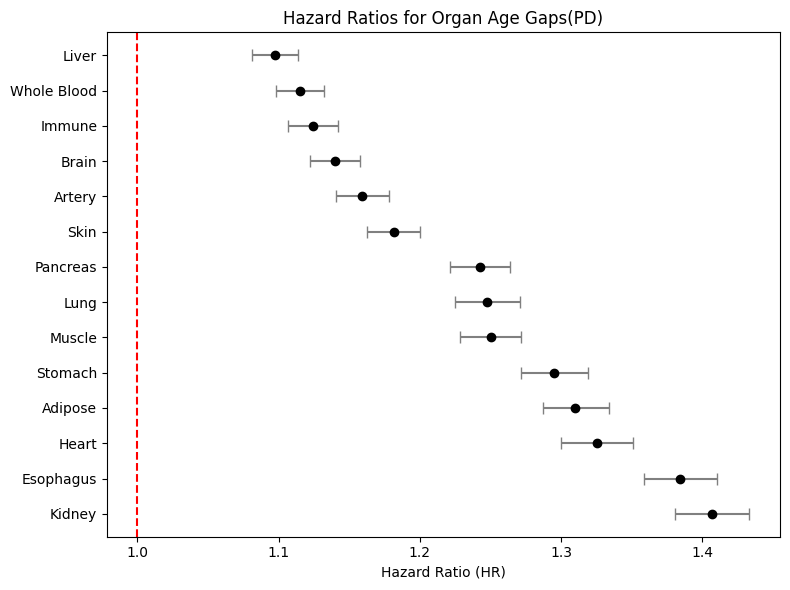

In [90]:
all_results_df_sorted = all_results_df_PD.sort_values(by='exp(coef)', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
organs = all_results_df_sorted['organ']
hr = all_results_df_sorted['exp(coef)']
lower_ci = all_results_df_sorted['exp(coef) lower 95%']
upper_ci = all_results_df_sorted['exp(coef) upper 95%']

# Plot horizontal lines for confidence intervals
ax.errorbar(hr, organs, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Add a vertical line at HR = 1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

ax.set_xlabel('Hazard Ratio (HR)')
ax.set_title('Hazard Ratios for Organ Age Gaps(PD)')
plt.tight_layout()
plt.savefig("HR_age_gap_PD", dpi=300, bbox_inches='tight')
plt.show()

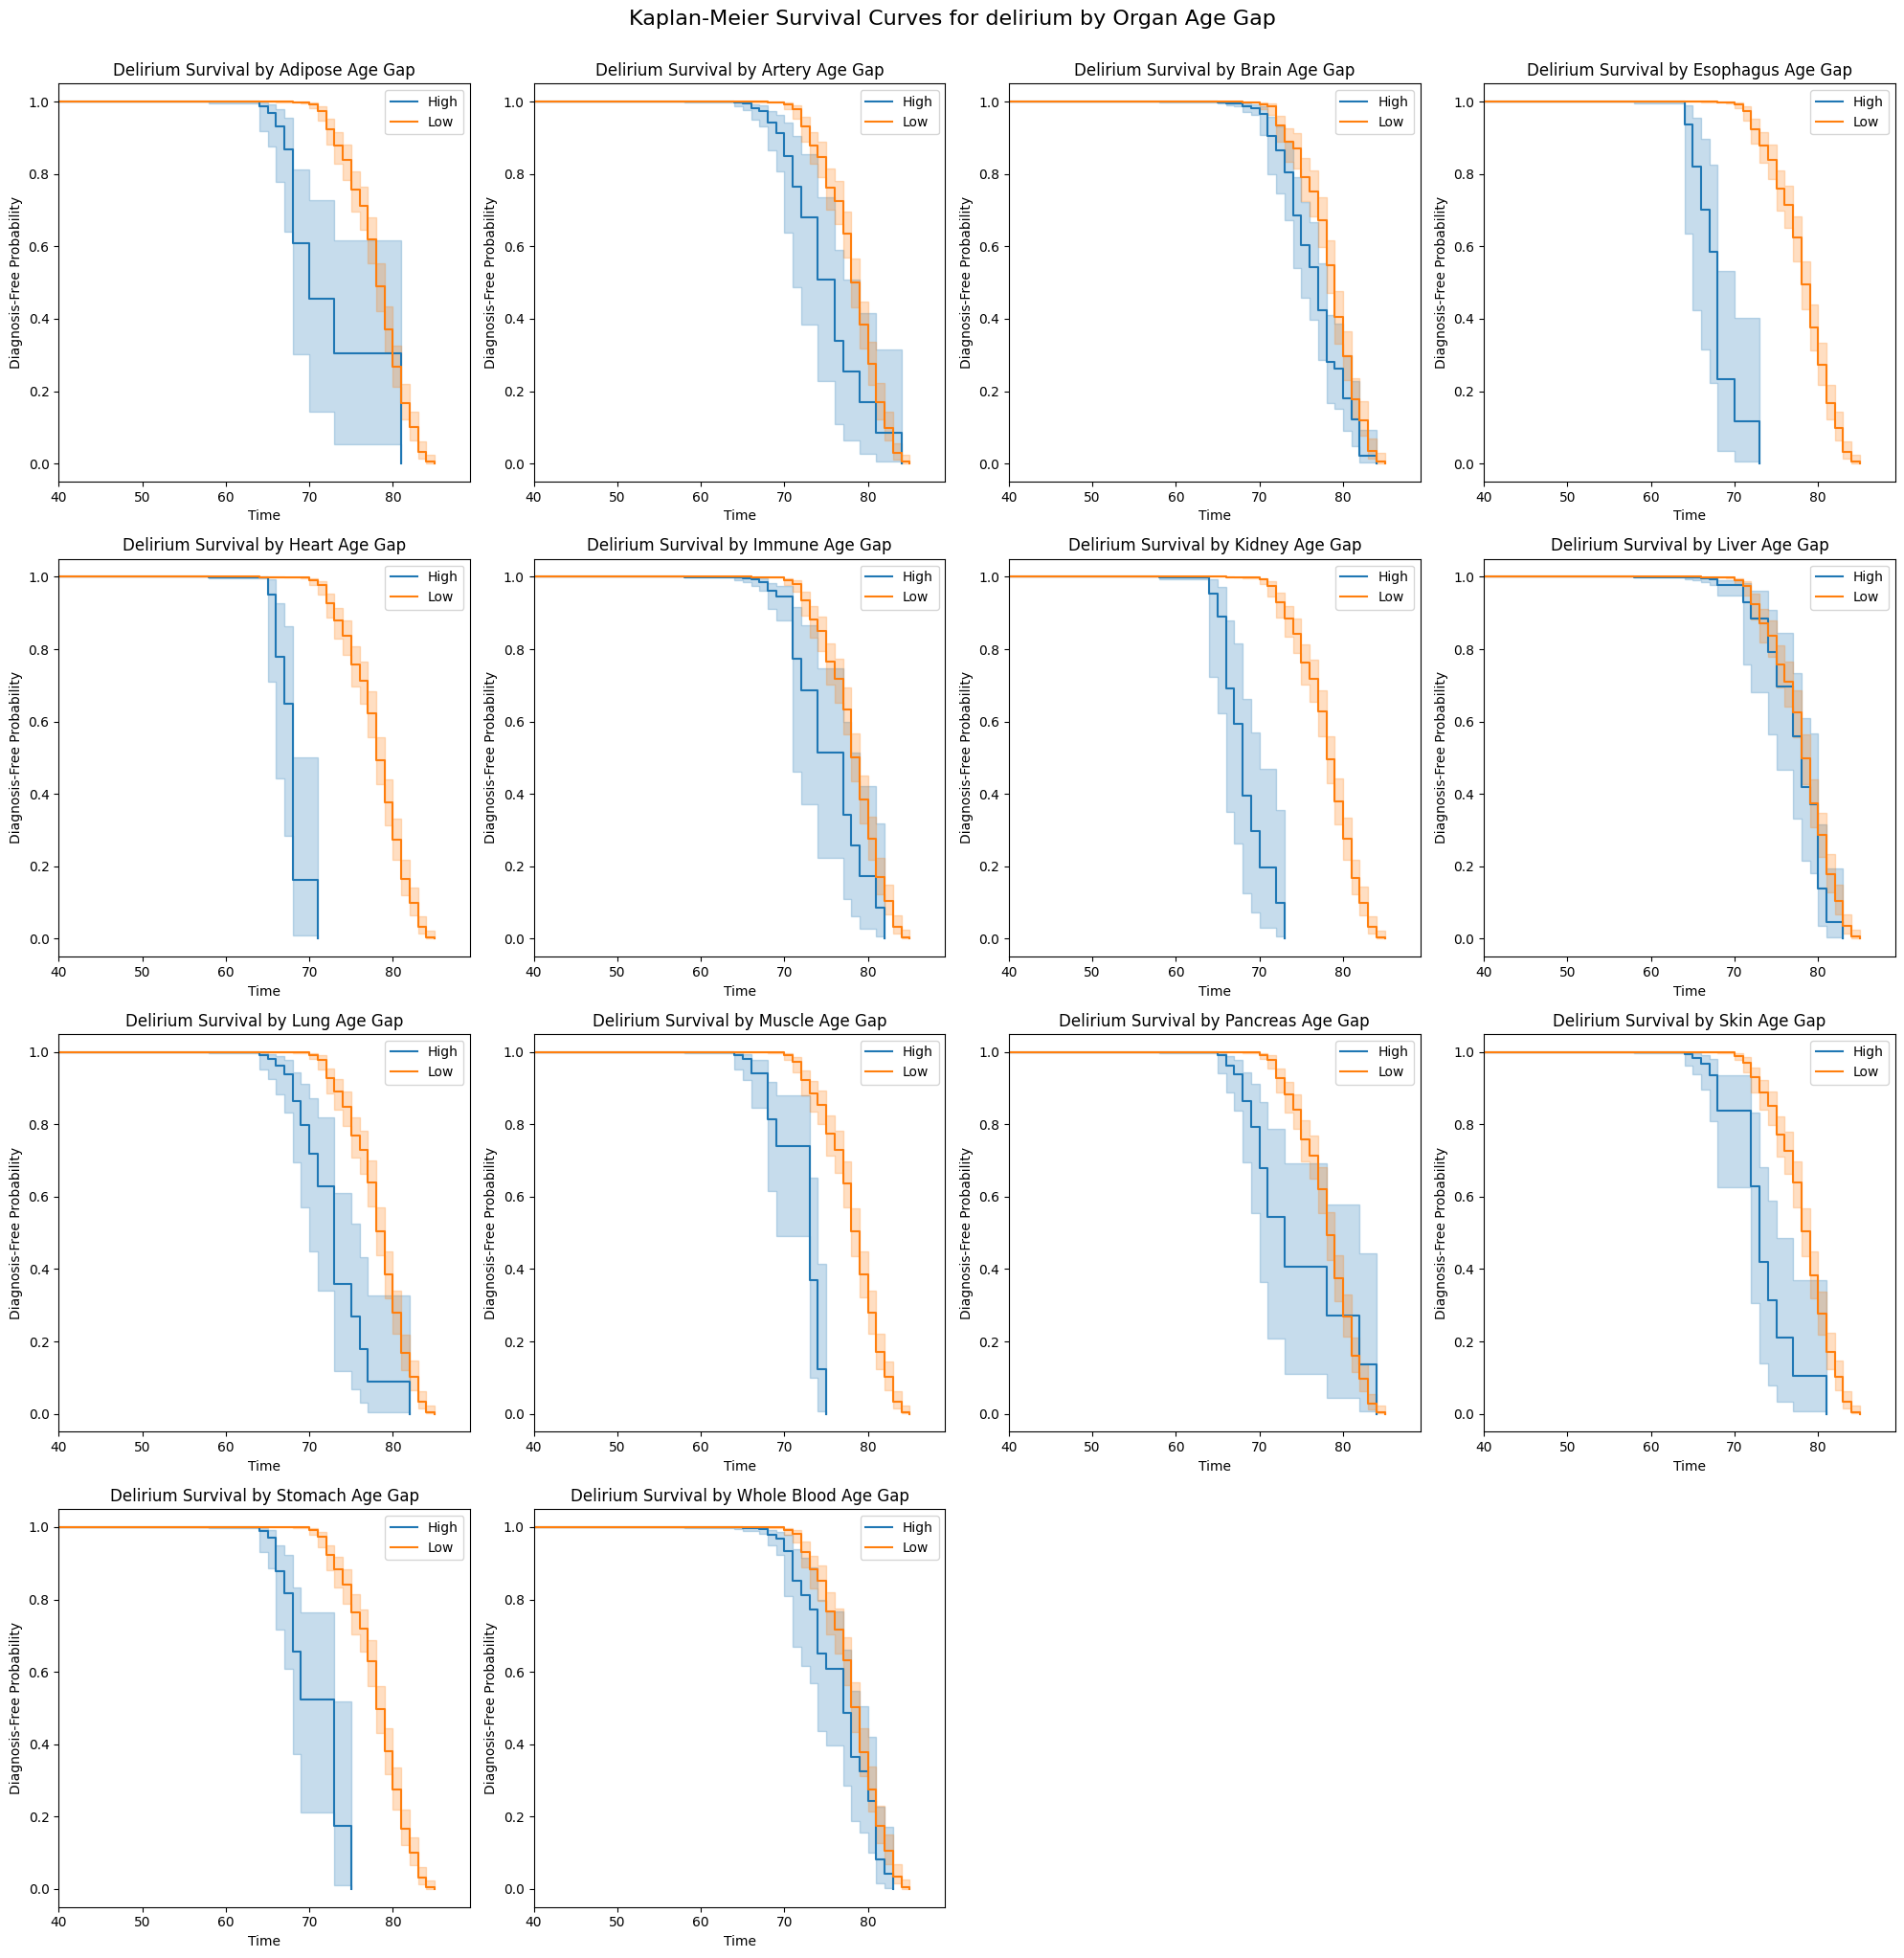

In [120]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_Delirium = df_merged[df_merged['disease_group'].isin(['delirium', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_Delirium[organ].median()
    df_Delirium['organ_group'] = df_Delirium[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_Delirium['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_Delirium[mask]['event_time'], df_Delirium[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'Delirium Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')
    ax.set_xlim(left=40)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for delirium by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("Delirium_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

In [91]:
organ_cols = ['Adipose', 'Artery', 'Brain', 'Esophagus', 'Heart', 'Immune', 'Kidney',
    'Liver', 'Lung', 'Muscle', 'Pancreas', 'Skin', 'Stomach', 'Whole Blood'] 

results = []

for organ in organ_cols:
    df_temp = df_Delirium[['event_time', 'event_observed', organ]].dropna()
    df_temp = df_temp.rename(columns={organ: 'OrganAgeGap'})
    
    cph = CoxPHFitter()
    cph.fit(df_temp, duration_col='event_time', event_col='event_observed')
    
    summary = cph.summary
    summary['organ'] = organ
    results.append(summary)

# Combine all summaries
all_results_df_Delirium = pd.concat(results)

# Reorder columns for clarity
all_results_df_Delirium = all_results_df_Delirium.reset_index(drop=True)
cols_order = ['organ', 'coef', 'exp(coef)', 'se(coef)', 'p', 'exp(coef) lower 95%', 'exp(coef) upper 95%']
all_results_df_Delirium = all_results_df_Delirium[cols_order]

all_results_df_Delirium

,organ,coef,exp(coef),se(coef),p,exp(coef) lower 95%,exp(coef) upper 95%
0,Adipose,0.166395,1.181040,0.016921,8.055881e-23,1.142514,1.220865
1,Artery,0.118909,1.126268,0.016044,1.249601e-13,1.091402,1.162247
2,Brain,0.097824,1.102769,0.016668,4.382587e-09,1.067326,1.139389
3,Esophagus,0.367310,1.443845,0.025269,7.143218e-48,1.374080,1.517152
4,Heart,0.296781,1.345520,0.025914,2.286562e-30,1.278886,1.415626
5,Immune,0.106900,1.112823,0.016294,5.349866e-11,1.077847,1.148935
6,Kidney,0.325902,1.385279,0.020990,2.290578e-54,1.329446,1.443457
7,Liver,0.071179,1.073773,0.013317,9.034211e-08,1.046110,1.102168
8,Lung,0.166053,1.180636,0.018530,3.213703e-19,1.138526,1.224304
9,Muscle,0.221120,1.247473,0.020563,5.705588e-27,1.198197,1.298776


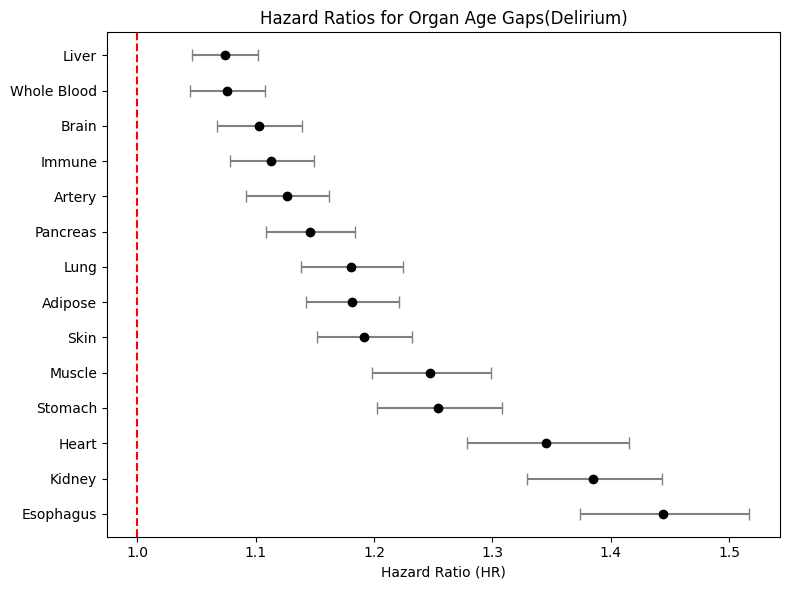

In [92]:
all_results_df_sorted = all_results_df_Delirium.sort_values(by='exp(coef)', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
organs = all_results_df_sorted['organ']
hr = all_results_df_sorted['exp(coef)']
lower_ci = all_results_df_sorted['exp(coef) lower 95%']
upper_ci = all_results_df_sorted['exp(coef) upper 95%']

# Plot horizontal lines for confidence intervals
ax.errorbar(hr, organs, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Add a vertical line at HR = 1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

ax.set_xlabel('Hazard Ratio (HR)')
ax.set_title('Hazard Ratios for Organ Age Gaps(Delirium)')
plt.tight_layout()
plt.savefig("HR_age_gap_Delirium", dpi=300, bbox_inches='tight')
plt.show()

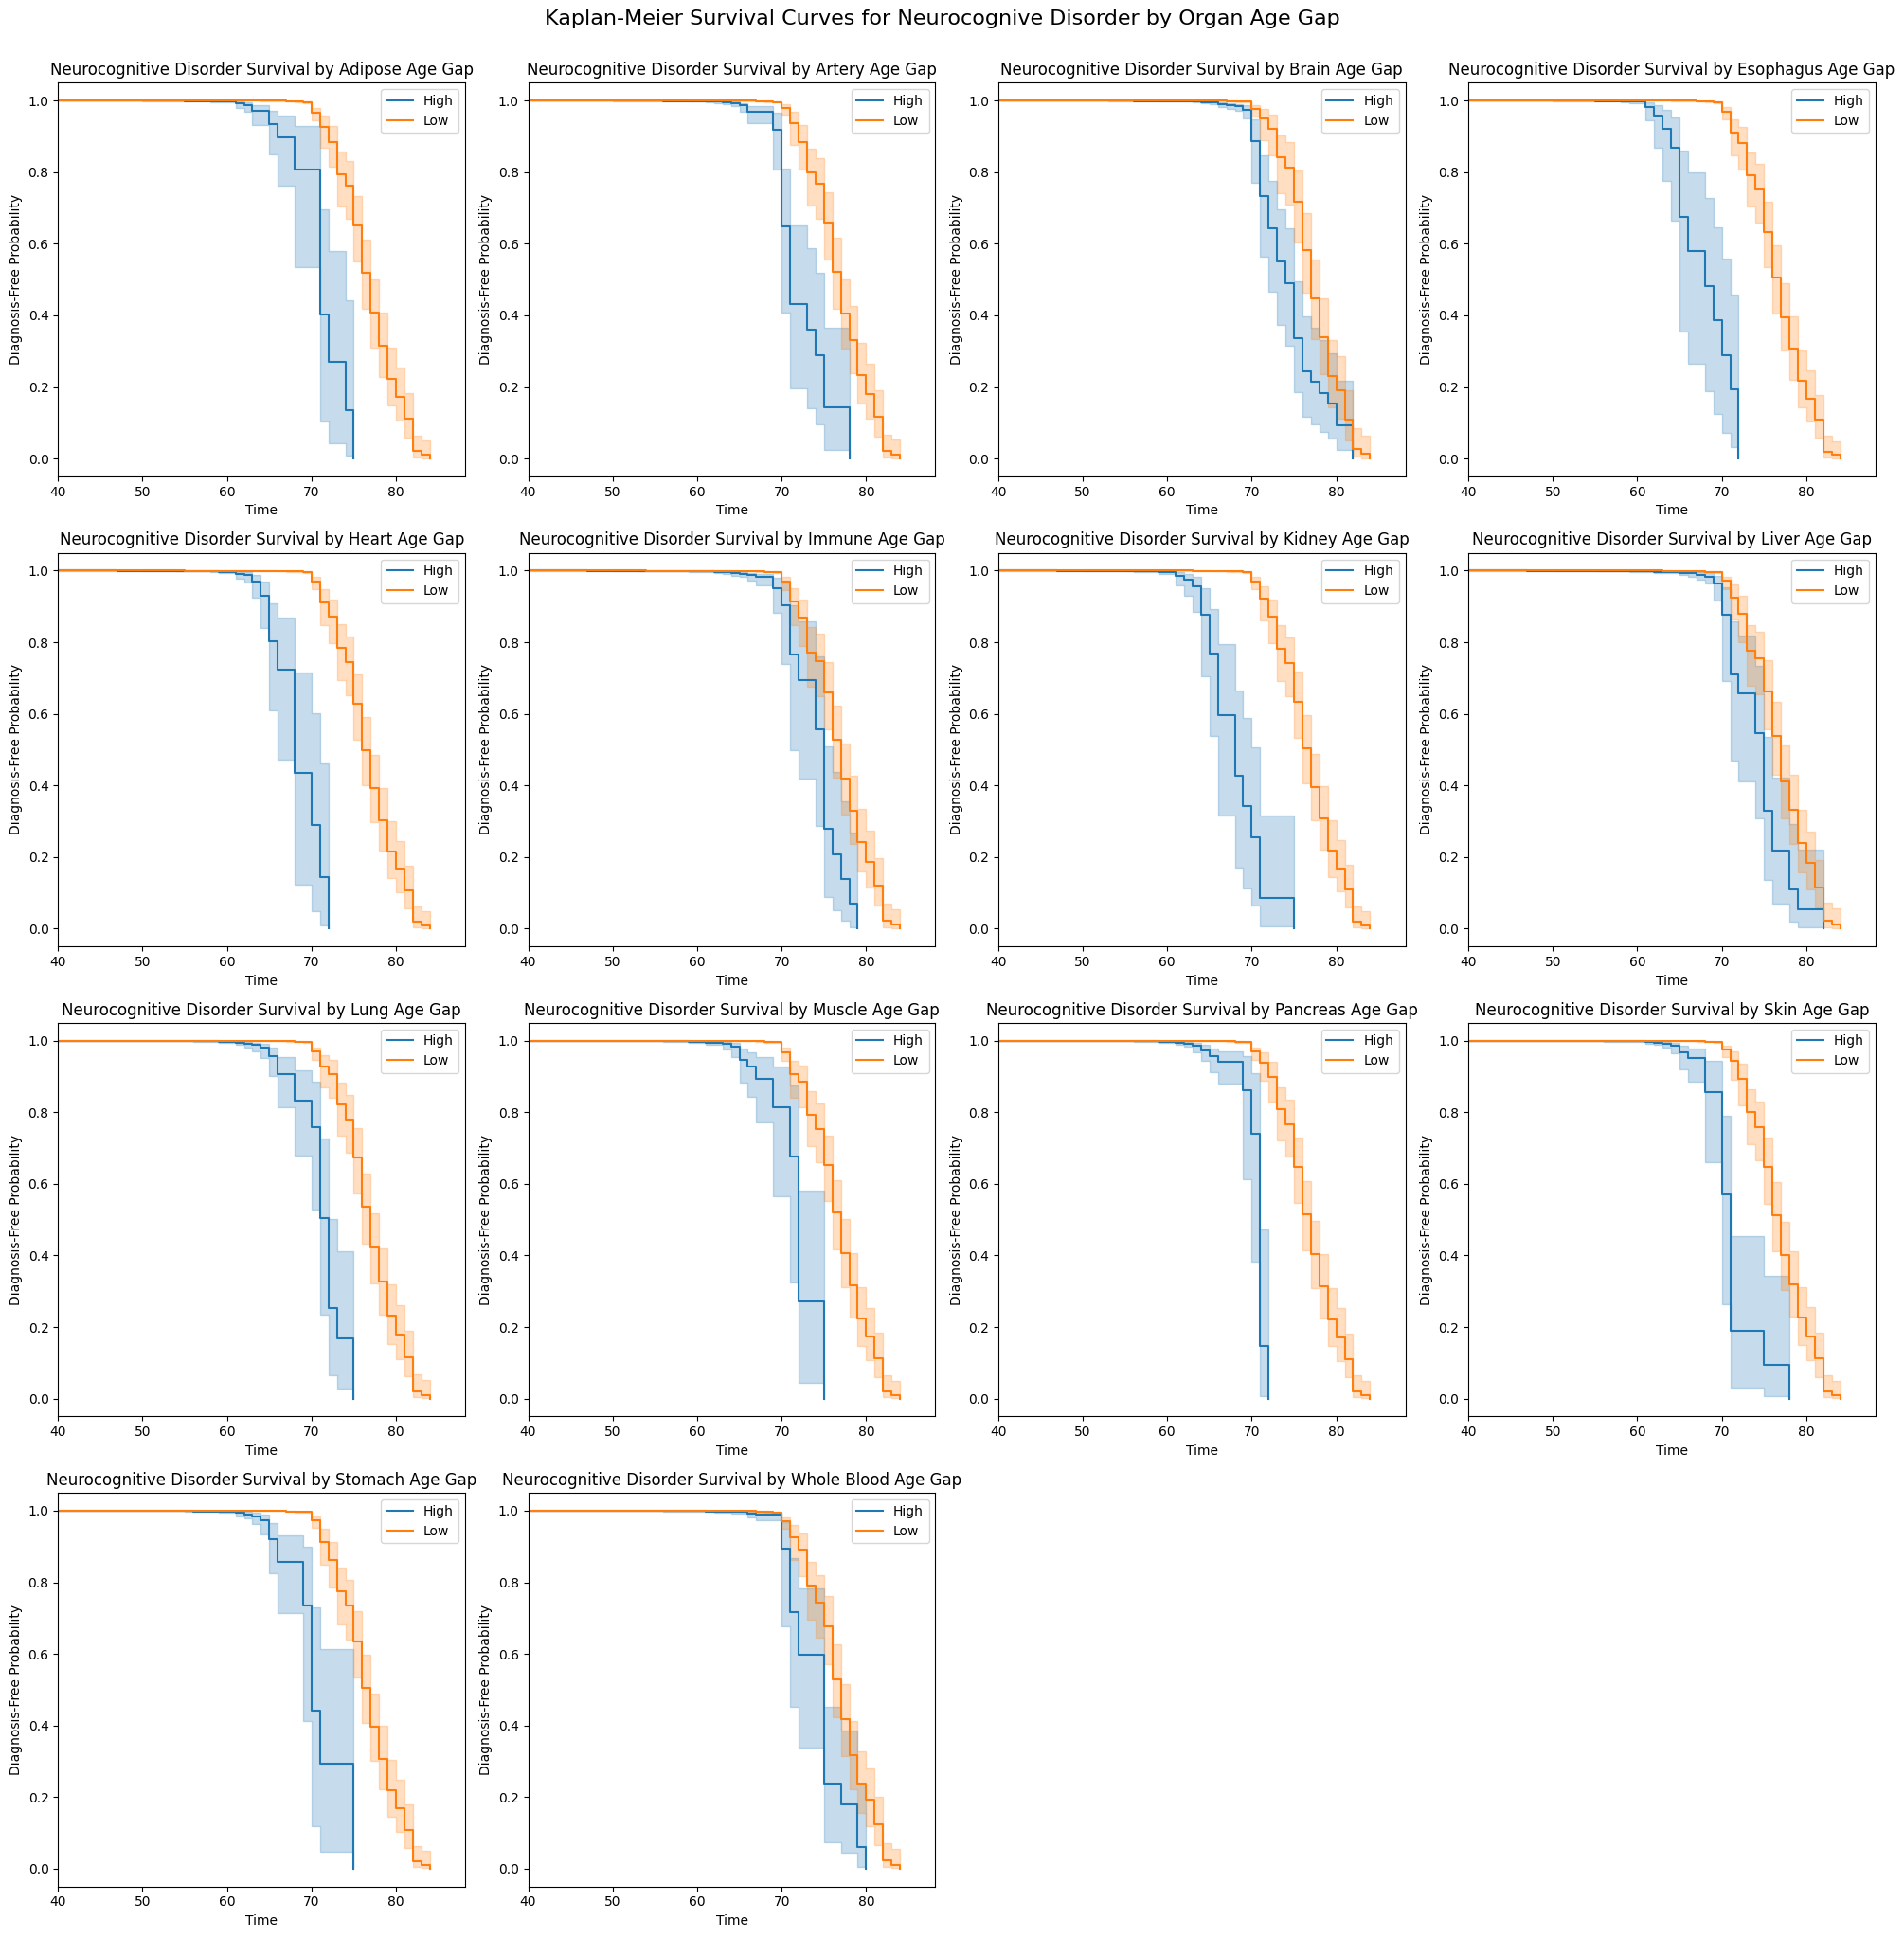

In [121]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_NC = df_merged[df_merged['disease_group'].isin(['neurocognitive_disorder', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_NC[organ].median()
    df_NC['organ_group'] = df_NC[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_NC['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_NC[mask]['event_time'], df_NC[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'Neurocognitive Disorder Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')
    ax.set_xlim(left=40)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for Neurocognive Disorder by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("Neurocognitive_disorder_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

In [93]:
organ_cols = ['Adipose', 'Artery', 'Brain', 'Esophagus', 'Heart', 'Immune', 'Kidney',
    'Liver', 'Lung', 'Muscle', 'Pancreas', 'Skin', 'Stomach', 'Whole Blood'] 

results = []

for organ in organ_cols:
    df_temp = df_NC[['event_time', 'event_observed', organ]].dropna()
    df_temp = df_temp.rename(columns={organ: 'OrganAgeGap'})
    
    cph = CoxPHFitter()
    cph.fit(df_temp, duration_col='event_time', event_col='event_observed')
    
    summary = cph.summary
    summary['organ'] = organ
    results.append(summary)

# Combine all summaries
all_results_df_NC = pd.concat(results)

# Reorder columns for clarity
all_results_df_NC = all_results_df_NC.reset_index(drop=True)
cols_order = ['organ', 'coef', 'exp(coef)', 'se(coef)', 'p', 'exp(coef) lower 95%', 'exp(coef) upper 95%']
all_results_df_NC = all_results_df_NC[cols_order]

all_results_df_NC

,organ,coef,exp(coef),se(coef),p,exp(coef) lower 95%,exp(coef) upper 95%
0,Adipose,0.316465,1.372269,0.021685,3.089989e-48,1.315166,1.431851
1,Artery,0.186480,1.205000,0.018813,3.682068e-23,1.161378,1.250261
2,Brain,0.151522,1.163604,0.017406,3.169031e-18,1.124577,1.203984
3,Esophagus,0.398528,1.489630,0.022395,7.664286e-71,1.425659,1.556471
4,Heart,0.397603,1.488254,0.027297,4.634555e-48,1.410723,1.570045
5,Immune,0.144261,1.155186,0.017270,6.639623e-17,1.116739,1.194956
6,Kidney,0.381005,1.463755,0.023412,1.513012e-59,1.398105,1.532487
7,Liver,0.159944,1.173445,0.018407,3.644554e-18,1.131865,1.216552
8,Lung,0.302891,1.353767,0.022715,1.463519e-40,1.294818,1.415400
9,Muscle,0.297141,1.346006,0.020704,1.034743e-46,1.292480,1.401748


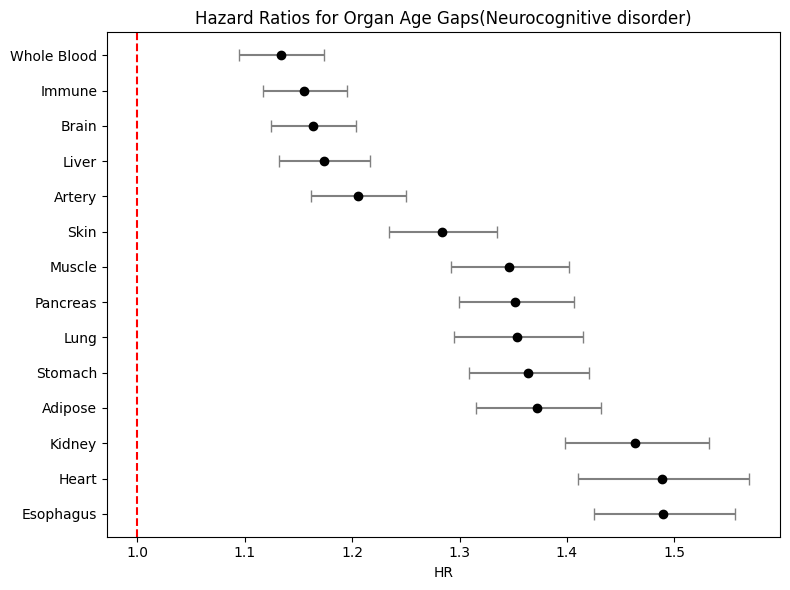

In [94]:
all_results_df_sorted = all_results_df_NC.sort_values(by='exp(coef)', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
organs = all_results_df_sorted['organ']
hr = all_results_df_sorted['exp(coef)']
lower_ci = all_results_df_sorted['exp(coef) lower 95%']
upper_ci = all_results_df_sorted['exp(coef) upper 95%']

# Plot horizontal lines for confidence intervals
ax.errorbar(hr, organs, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Add a vertical line at HR = 1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

ax.set_xlabel('HR')
ax.set_title('Hazard Ratios for Organ Age Gaps(Neurocognitive disorder)')
plt.tight_layout()
plt.savefig("HR_age_gap_NC", dpi=300, bbox_inches='tight')
plt.show()

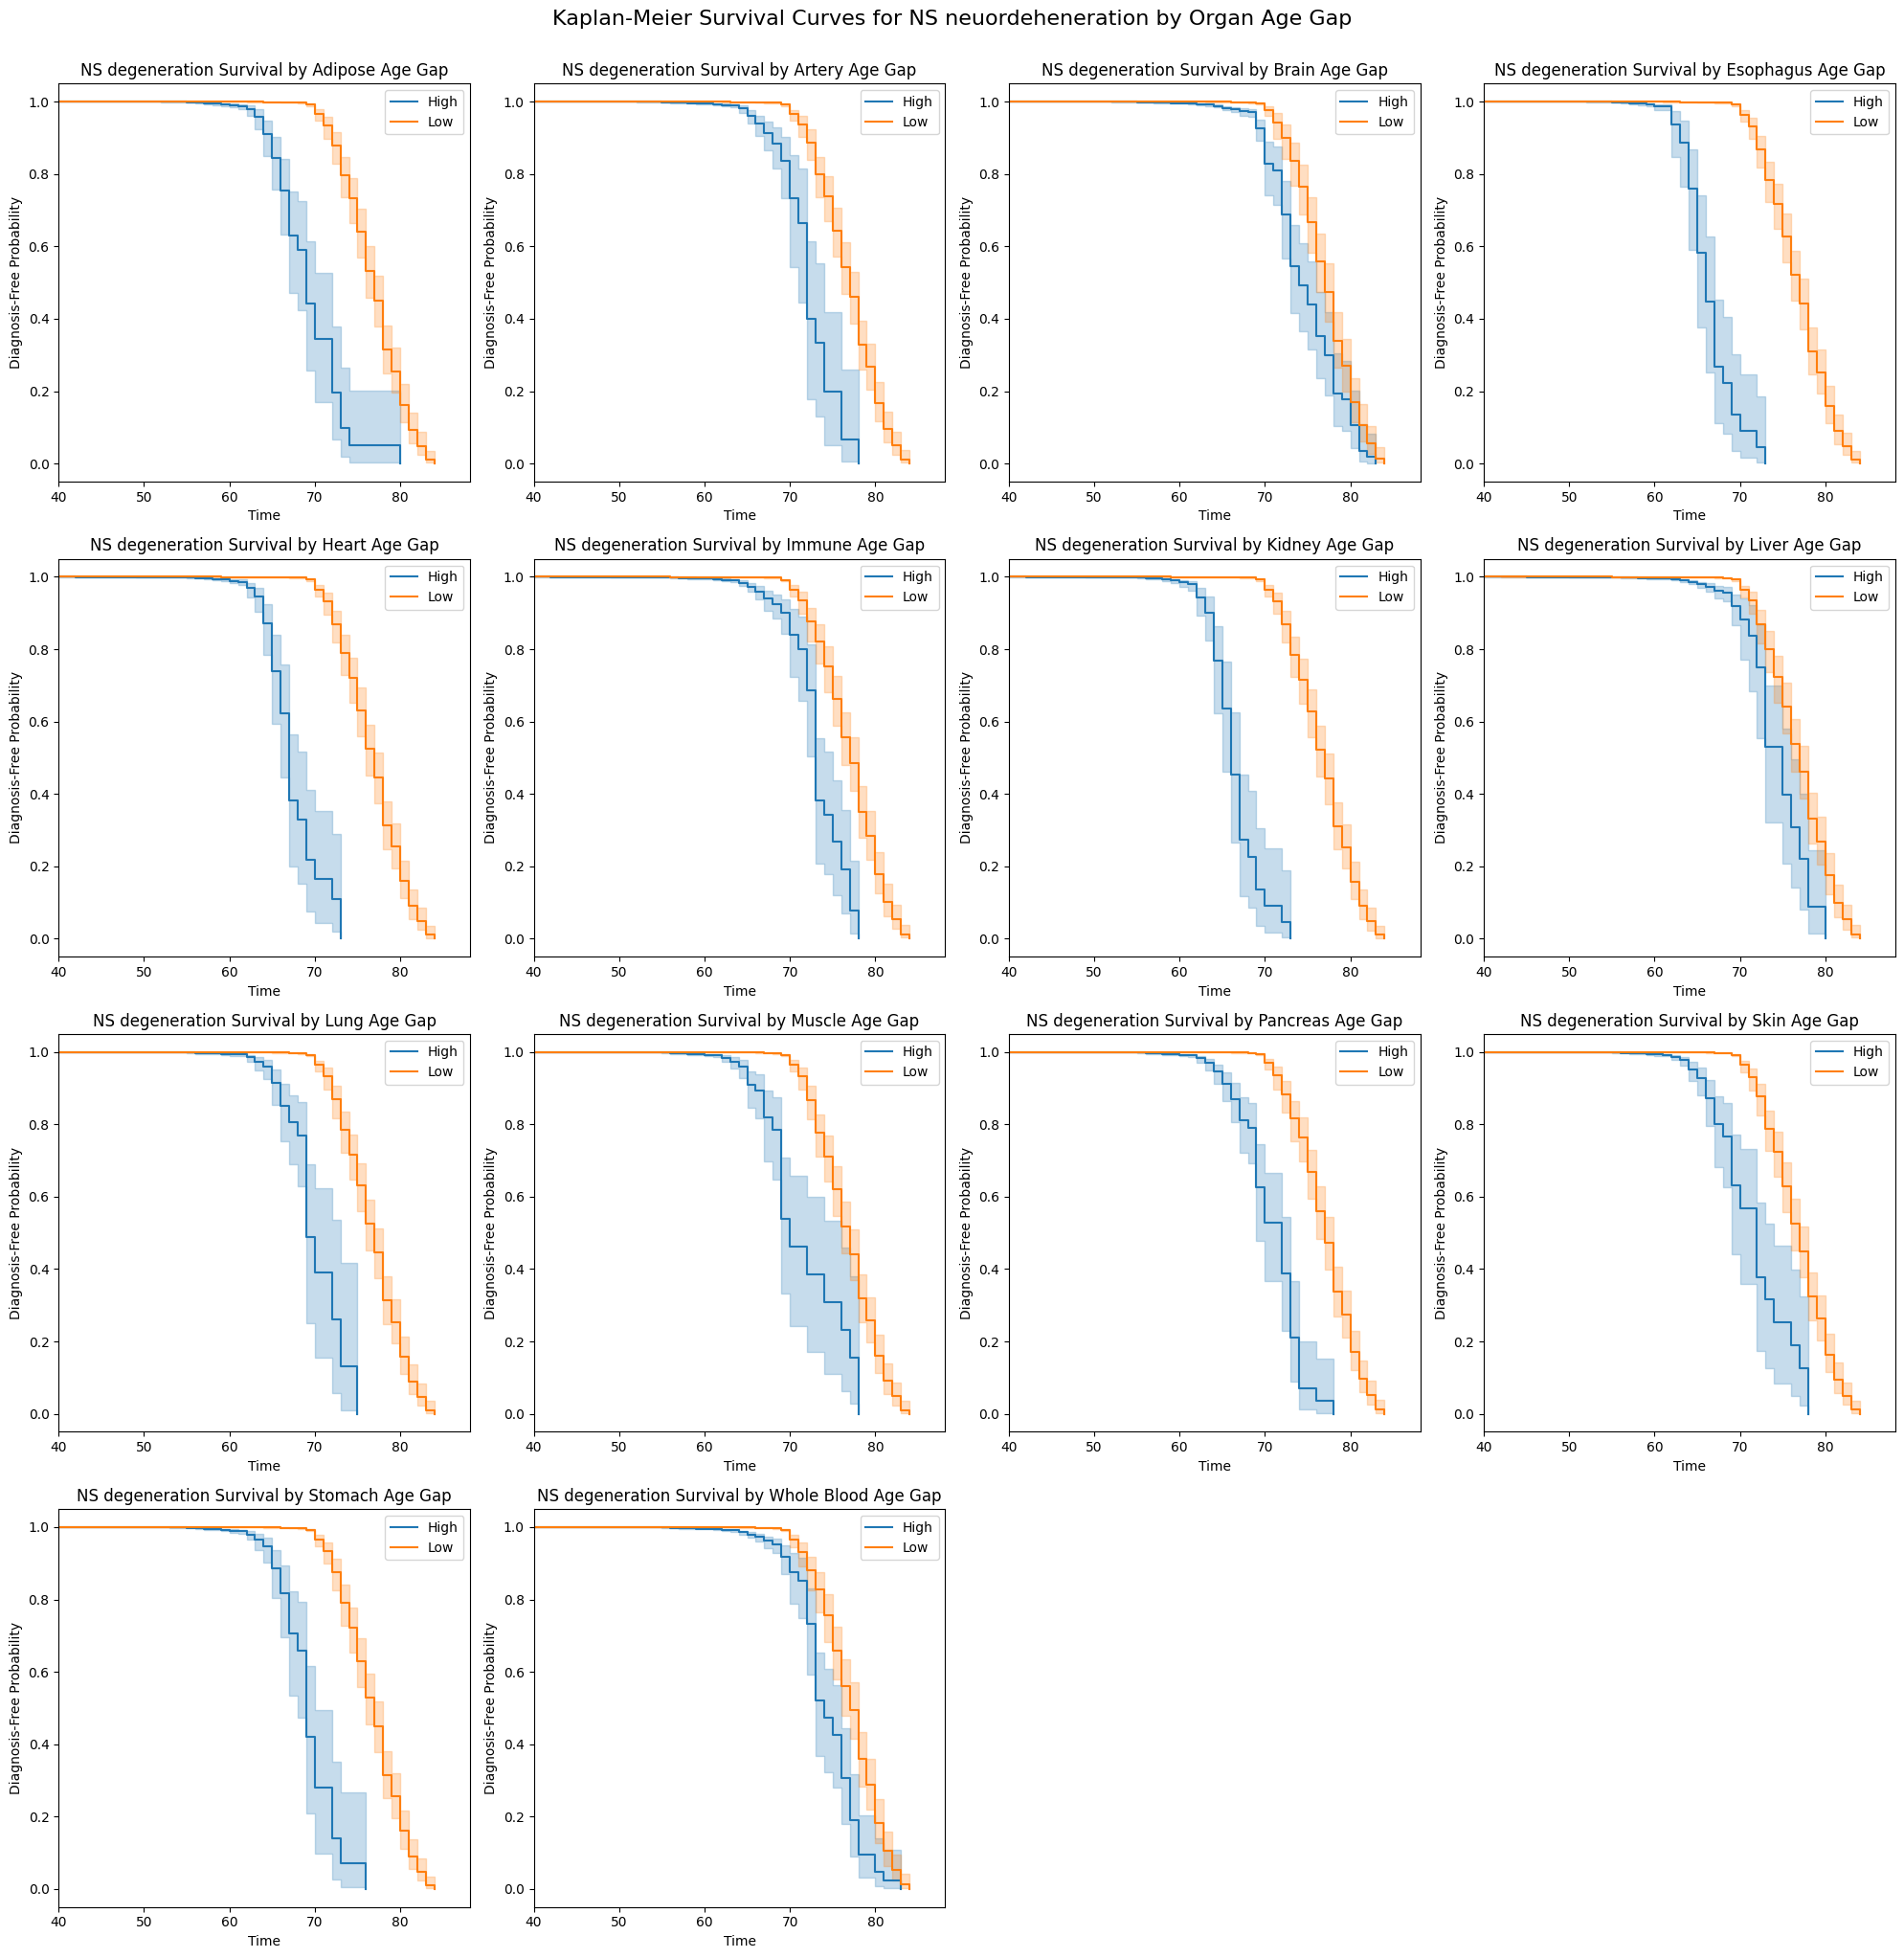

In [122]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_NS = df_merged[df_merged['disease_group'].isin(['ns_degeneration', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_NS[organ].median()
    df_NS['organ_group'] = df_NS[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_NS['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_NS[mask]['event_time'], df_NS[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'NS degeneration Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')
    ax.set_xlim(left=40)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for NS neuordeheneration by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("NS neurodegeneration_disorder_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

In [95]:
organ_cols = ['Adipose', 'Artery', 'Brain', 'Esophagus', 'Heart', 'Immune', 'Kidney',
    'Liver', 'Lung', 'Muscle', 'Pancreas', 'Skin', 'Stomach', 'Whole Blood'] 

results = []

for organ in organ_cols:
    df_temp = df_NS[['event_time', 'event_observed', organ]].dropna()
    df_temp = df_temp.rename(columns={organ: 'OrganAgeGap'})
    
    cph = CoxPHFitter()
    cph.fit(df_temp, duration_col='event_time', event_col='event_observed')
    
    summary = cph.summary
    summary['organ'] = organ
    results.append(summary)

# Combine all summaries
all_results_df_NS = pd.concat(results)

# Reorder columns for clarity
all_results_df_NS = all_results_df_NS.reset_index(drop=True)
cols_order = ['organ', 'coef', 'exp(coef)', 'se(coef)', 'p', 'exp(coef) lower 95%', 'exp(coef) upper 95%']
all_results_df_NS = all_results_df_NS[cols_order]

all_results_df_NS

,organ,coef,exp(coef),se(coef),p,exp(coef) lower 95%,exp(coef) upper 95%
0,Adipose,0.328722,1.389192,0.013621,1.090305e-128,1.352597,1.426777
1,Artery,0.191370,1.210907,0.011712,5.198243e-60,1.183426,1.239026
2,Brain,0.175813,1.192215,0.012446,2.637686e-45,1.163483,1.221656
3,Esophagus,0.402210,1.495125,0.015164,5.013984e-155,1.451344,1.540227
4,Heart,0.383916,1.468022,0.018730,2.284596e-93,1.415107,1.522916
5,Immune,0.210556,1.234364,0.013588,3.727045e-54,1.201923,1.267680
6,Kidney,0.425542,1.530420,0.015857,1.220055e-158,1.483588,1.578731
7,Liver,0.160625,1.174245,0.013550,2.043528e-32,1.143470,1.205847
8,Lung,0.309108,1.362210,0.016291,2.818184e-80,1.319400,1.406408
9,Muscle,0.270913,1.311161,0.014878,4.384826e-74,1.273479,1.349958


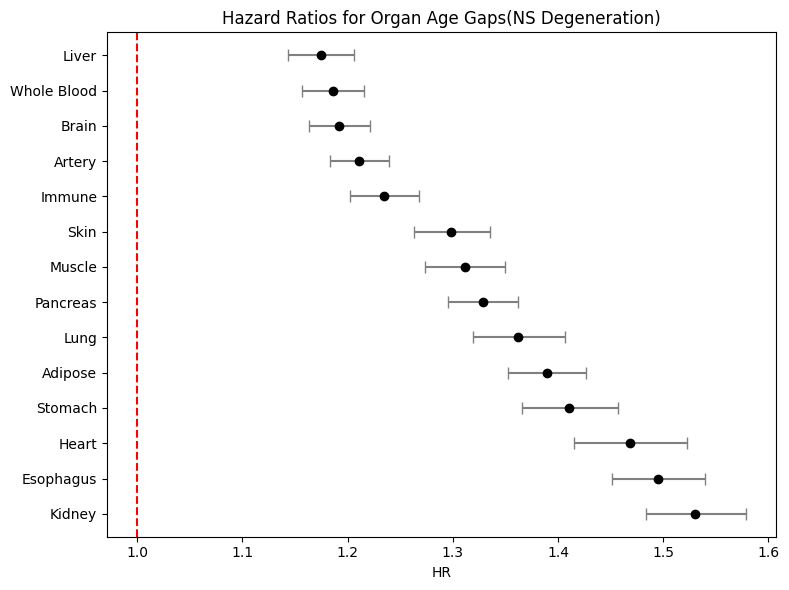

In [96]:
organ_cols = ['Adipose', 'Artery', 'Brain', 'Esophagus', 'Heart', 'Immune', 'Kidney',
    'Liver', 'Lung', 'Muscle', 'Pancreas', 'Skin', 'Stomach', 'Whole Blood'] 

results = []

for organ in organ_cols:
    df_temp = df_NS[['event_time', 'event_observed', organ]].dropna()
    df_temp = df_temp.rename(columns={organ: 'OrganAgeGap'})
    
    cph = CoxPHFitter()
    cph.fit(df_temp, duration_col='event_time', event_col='event_observed')
    
    summary = cph.summary
    summary['organ'] = organ
    results.append(summary)

# Combine all summaries
all_results_df_NC = pd.concat(results)

# Reorder columns for clarity
all_results_df_NC = all_results_df_NC.reset_index(drop=True)
cols_order = ['organ', 'coef', 'exp(coef)', 'se(coef)', 'p', 'exp(coef) lower 95%', 'exp(coef) upper 95%']
all_results_df_NC = all_results_df_NC[cols_order]

all_results_df_NC
all_results_df_sorted = all_results_df_NC.sort_values(by='exp(coef)', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
organs = all_results_df_sorted['organ']
hr = all_results_df_sorted['exp(coef)']
lower_ci = all_results_df_sorted['exp(coef) lower 95%']
upper_ci = all_results_df_sorted['exp(coef) upper 95%']

# Plot horizontal lines for confidence intervals
ax.errorbar(hr, organs, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Add a vertical line at HR = 1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

ax.set_xlabel('HR')
ax.set_title('Hazard Ratios for Organ Age Gaps(NS Degeneration)')
plt.tight_layout()
plt.savefig("HR_age_gap_NS", dpi=300, bbox_inches='tight')
plt.show()

In [97]:
all_columns = pd.read_csv("main_data_with_PC1.csv", nrows=0).columns.tolist()

In [98]:
start_col = "Adipose_PC1"
end_col = "Whole Blood_PC1"

start_idx = all_columns.index(start_col)
end_idx = all_columns.index(end_col)

desired_columns = ["eid"] + all_columns[start_idx:end_idx + 1]

main_data = pd.read_csv("main_data_with_PC1.csv", usecols=desired_columns)

In [99]:
main_data

,eid,Adipose_PC1,Artery_PC1,Brain_PC1,Esophagus_PC1,Heart_PC1,Immune_PC1,Intestine_PC1,Kidney_PC1,Liver_PC1,Lung_PC1,Muscle_PC1,Pancreas_PC1,Skin_PC1,Stomach_PC1,Whole Blood_PC1
0,1000024,-0.369153,0.197273,0.960430,-0.717002,-0.722385,1.303253,2.681153,-0.433052,-0.652987,0.936314,-1.402988,5.988106,0.625040,0.645664,-2.800662
1,1000043,-2.042765,-0.932720,-1.212627,0.940451,1.397298,-0.093359,-1.256863,-0.113210,-1.756817,-0.144261,-0.509540,-1.177616,0.255515,2.993833,4.432281
2,1000156,0.863377,-1.114480,4.531098,0.971655,-0.961267,-4.361638,-3.044292,-0.332554,3.115975,1.625565,-0.375860,-0.968636,-1.046977,-1.138501,-3.673011
3,1000217,0.462828,0.258893,5.154136,-0.205016,0.198180,-0.447104,7.067998,1.563478,2.234244,0.274612,-0.747867,6.070332,0.846050,2.772288,1.098881
4,1000309,-3.120864,-2.567147,0.890820,0.052980,0.325453,-1.397951,1.143069,1.601042,-0.642389,-2.131549,0.121562,3.338186,0.441217,0.139011,0.523095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52695,6023140,0.154717,-0.366379,-0.426326,0.189556,-1.003728,1.380405,-0.510587,-0.439088,3.353094,0.075997,-4.492066,-2.802748,-1.513215,-3.233504,1.171153
52696,6023206,-0.761479,0.976342,-0.846404,0.902474,0.099718,2.084492,1.225070,0.708167,2.324371,-1.656841,6.618258,3.113782,2.449672,-0.214516,2.239805
52697,6023457,-0.938589,-0.141572,0.189548,-0.498991,-0.824674,3.311513,-1.456235,0.433816,-2.579610,-0.591359,0.930197,-4.764542,1.233305,-2.028132,3.438137
52698,6023548,0.726928,0.903995,1.441981,-0.311164,1.741960,-1.260204,6.707043,0.612205,4.719469,0.843217,1.696371,0.226650,2.206144,5.011710,-4.524493


In [100]:
df_merged_PC1 = df_merged.merge(main_data, on='eid', how='left')

In [101]:
df_merged_PC1

,eid,event_time,event_observed,disease_group,Adipose,Artery,Brain,Esophagus,Heart,Immune,...,Immune_PC1,Intestine_PC1,Kidney_PC1,Liver_PC1,Lung_PC1,Muscle_PC1,Pancreas_PC1,Skin_PC1,Stomach_PC1,Whole Blood_PC1
0,1000024,71,1,dementia,-9.143051,-4.981655,4.178352,-9.890959,-8.563195,-5.443092,...,1.303253,2.681153,-0.433052,-0.652987,0.936314,-1.402988,5.988106,0.625040,0.645664,-2.800662
1,1002343,72,1,lbd,-6.642809,-1.698654,-1.594955,-5.383031,-6.896181,-10.954464,...,0.517009,-0.690302,-0.453328,-3.991146,-0.283142,0.153291,2.764008,-1.197401,-0.945070,-0.094851
2,1006011,75,1,dementia,-11.189788,-8.075164,-0.706298,-13.256648,-11.274012,-9.516524,...,-0.610268,1.026634,-0.453668,4.528584,-0.984915,2.841250,3.301326,-2.254663,2.596911,-3.339702
3,1017356,82,1,als,-11.445370,-8.167886,-4.319158,-6.102664,-10.302805,-8.360835,...,-0.857582,-0.659542,-0.656536,1.108486,-0.048344,-0.132593,1.923648,-0.060846,0.136232,-0.035391
4,1024241,55,1,ns_degeneration,9.718941,8.202293,2.390786,7.631432,8.555370,5.272066,...,-3.543144,-1.081058,0.010813,-2.103889,-2.046783,1.014493,1.161371,-0.164254,-0.066102,-3.963655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54368,6023140,55,0,none,-1.407284,-2.079217,-0.589227,-1.053575,2.672767,6.959924,...,1.380405,-0.510587,-0.439088,3.353094,0.075997,-4.492066,-2.802748,-1.513215,-3.233504,1.171153
54369,6023206,64,0,none,-6.889302,-3.642802,-6.417696,-6.562487,-3.795801,-10.596840,...,2.084492,1.225070,0.708167,2.324371,-1.656841,6.618258,3.113782,2.449672,-0.214516,2.239805
54370,6023457,48,0,none,10.898675,7.599310,5.995820,8.910251,10.538261,10.399887,...,3.311513,-1.456235,0.433816,-2.579610,-0.591359,0.930197,-4.764542,1.233305,-2.028132,3.438137
54371,6023548,62,0,none,-2.696049,-1.783136,5.340057,-4.836762,-4.468050,-5.824312,...,-1.260204,6.707043,0.612205,4.719469,0.843217,1.696371,0.226650,2.206144,5.011710,-4.524493


In [102]:
df_AD_PC1 = df_merged_PC1[df_merged_PC1['disease_group'].isin(['alzheimer', 'none'])].copy()

In [103]:
organ_cols_pc1 = [
    'Adipose_PC1', 'Artery_PC1', 'Brain_PC1', 'Esophagus_PC1', 'Heart_PC1', 'Immune_PC1', 'Kidney_PC1',
    'Liver_PC1', 'Lung_PC1', 'Muscle_PC1', 'Pancreas_PC1', 'Skin_PC1', 'Stomach_PC1', 'Whole Blood_PC1'
]

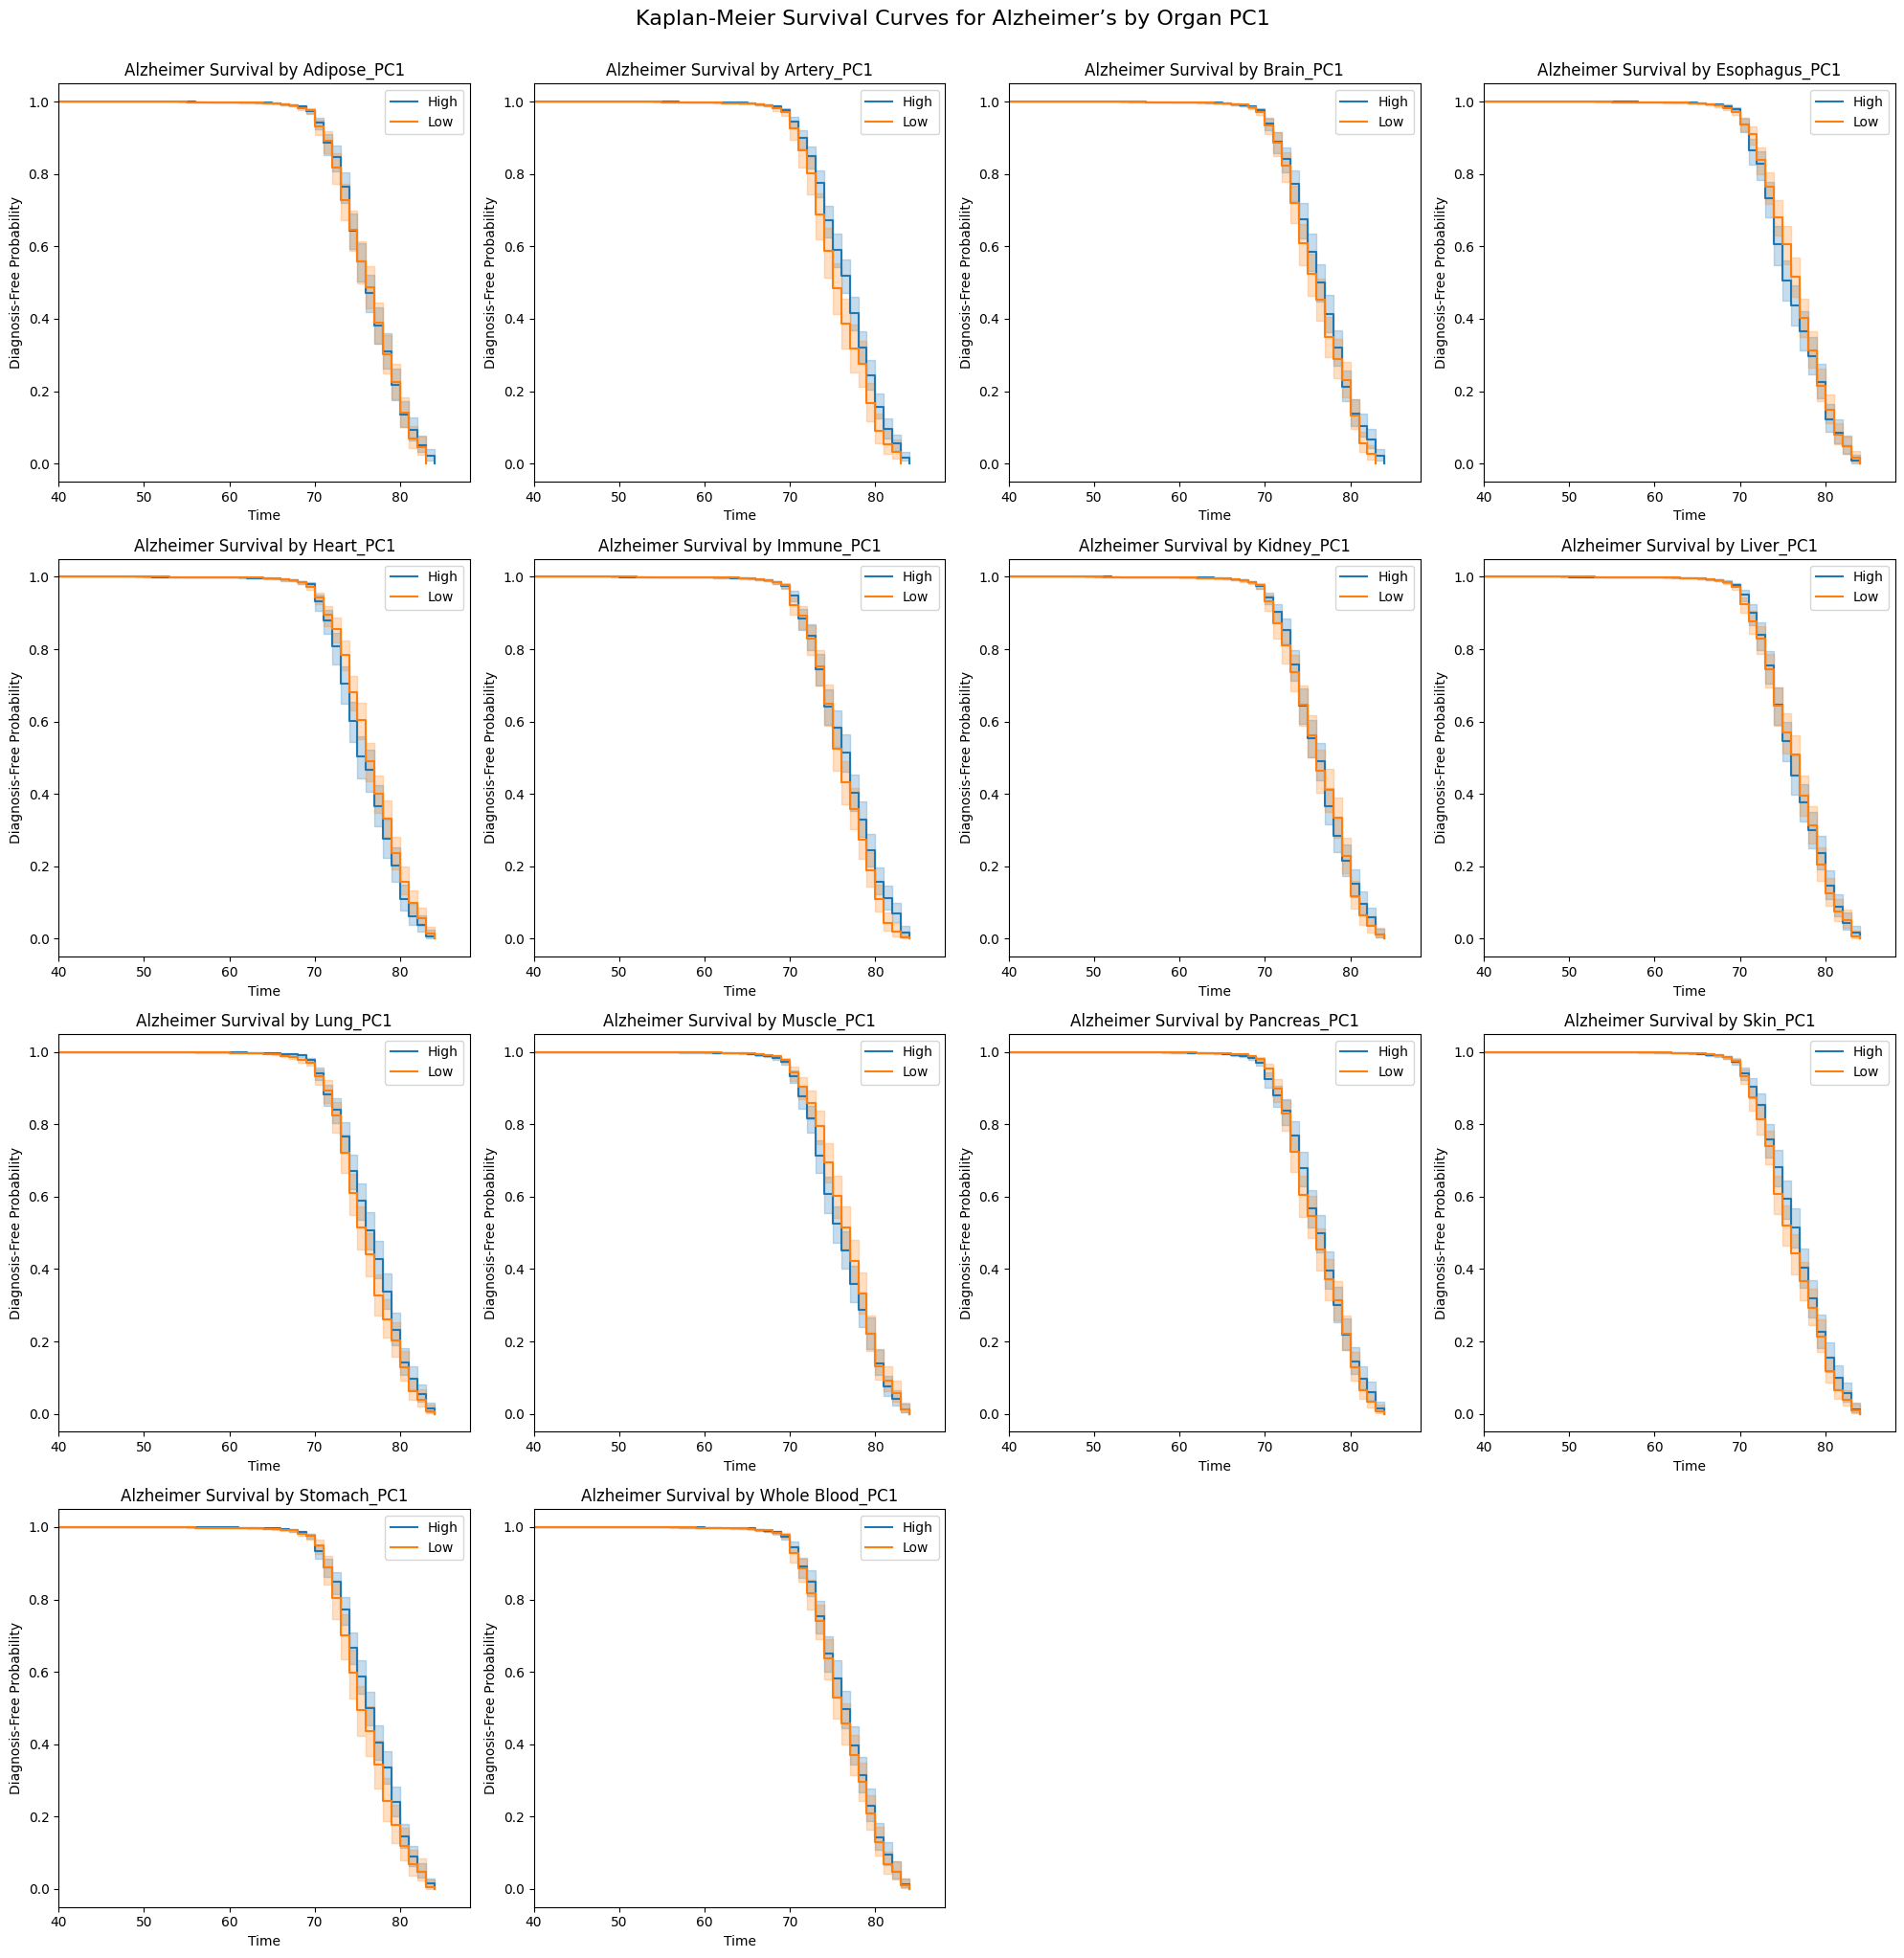

In [123]:
num_organs = len(organ_cols_pc1)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ PC1
for i, organ in enumerate(organ_cols_pc1):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_AD_PC1[organ].median()
    df_AD_PC1['organ_group'] = df_AD_PC1[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_AD_PC1['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_AD_PC1[mask]['event_time'], df_AD_PC1[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'Alzheimer Survival by {organ}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')
    ax.set_xlim(left=40)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for Alzheimer’s by Organ PC1', fontsize=16, y=1.02)
plt.savefig("alzheimers_kaplan_meier_by_organ_PC1.png", dpi=300, bbox_inches='tight')
plt.show()

In [105]:


results = []

for organ in organ_cols_pc1:
    df_temp = df_AD_PC1[['event_time', 'event_observed', organ]].dropna()
    df_temp = df_temp.rename(columns={organ: 'OrganAgeGap'})
    
    cph = CoxPHFitter()
    cph.fit(df_temp, duration_col='event_time', event_col='event_observed')
    
    summary = cph.summary
    summary['organ'] = organ
    results.append(summary)

# Combine all summaries
all_results_df = pd.concat(results)

# Reorder columns for clarity
all_results_df = all_results_df.reset_index(drop=True)
cols_order = ['organ', 'coef', 'exp(coef)', 'se(coef)', 'p', 'exp(coef) lower 95%', 'exp(coef) upper 95%']
all_results_df = all_results_df[cols_order]

all_results_df

,organ,coef,exp(coef),se(coef),p,exp(coef) lower 95%,exp(coef) upper 95%
0,Adipose_PC1,-0.027681,0.972699,0.026165,0.290085,0.924074,1.023882
1,Artery_PC1,-0.062092,0.939797,0.030426,0.041280,0.885391,0.997546
2,Brain_PC1,-0.020542,0.979667,0.010305,0.046214,0.960079,0.999655
3,Esophagus_PC1,0.026293,1.026641,0.037689,0.485412,0.953538,1.105349
4,Heart_PC1,0.042265,1.043171,0.031055,0.173515,0.981571,1.108637
5,Immune_PC1,-0.008559,0.991477,0.009956,0.389941,0.972318,1.011014
6,Kidney_PC1,-0.003315,0.996691,0.028979,0.908935,0.941658,1.054940
7,Liver_PC1,0.005328,1.005343,0.010679,0.617812,0.984519,1.026607
8,Lung_PC1,-0.115302,0.891097,0.028788,0.000062,0.842211,0.942820
9,Muscle_PC1,0.007604,1.007633,0.017081,0.656196,0.974457,1.041938


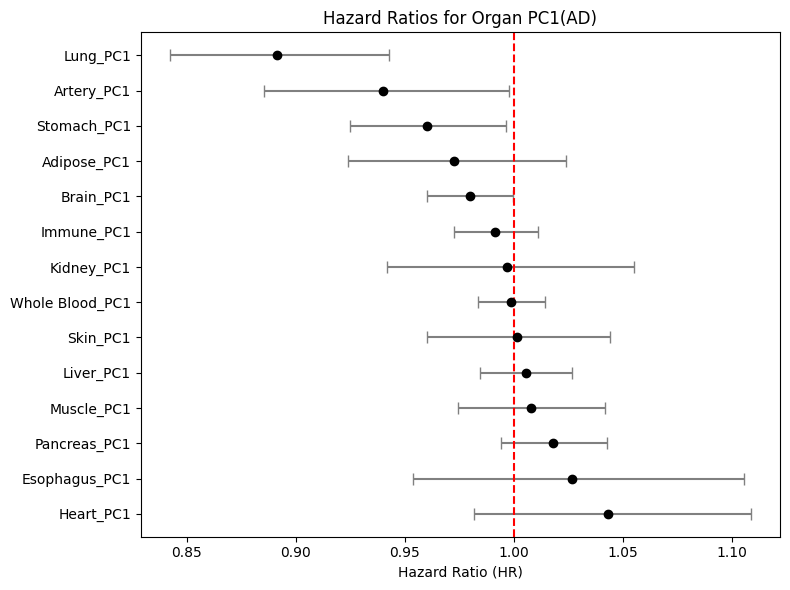

In [106]:
all_results_df_sorted = all_results_df.sort_values(by='exp(coef)', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
organs = all_results_df_sorted['organ']
hr = all_results_df_sorted['exp(coef)']
lower_ci = all_results_df_sorted['exp(coef) lower 95%']
upper_ci = all_results_df_sorted['exp(coef) upper 95%']

# Plot horizontal lines for confidence intervals
ax.errorbar(hr, organs, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Add a vertical line at HR = 1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

ax.set_xlabel('Hazard Ratio (HR)')
ax.set_title('Hazard Ratios for Organ PC1(AD)')
plt.tight_layout()
plt.savefig("HR_PC1_AD", dpi=300, bbox_inches='tight')
plt.show()

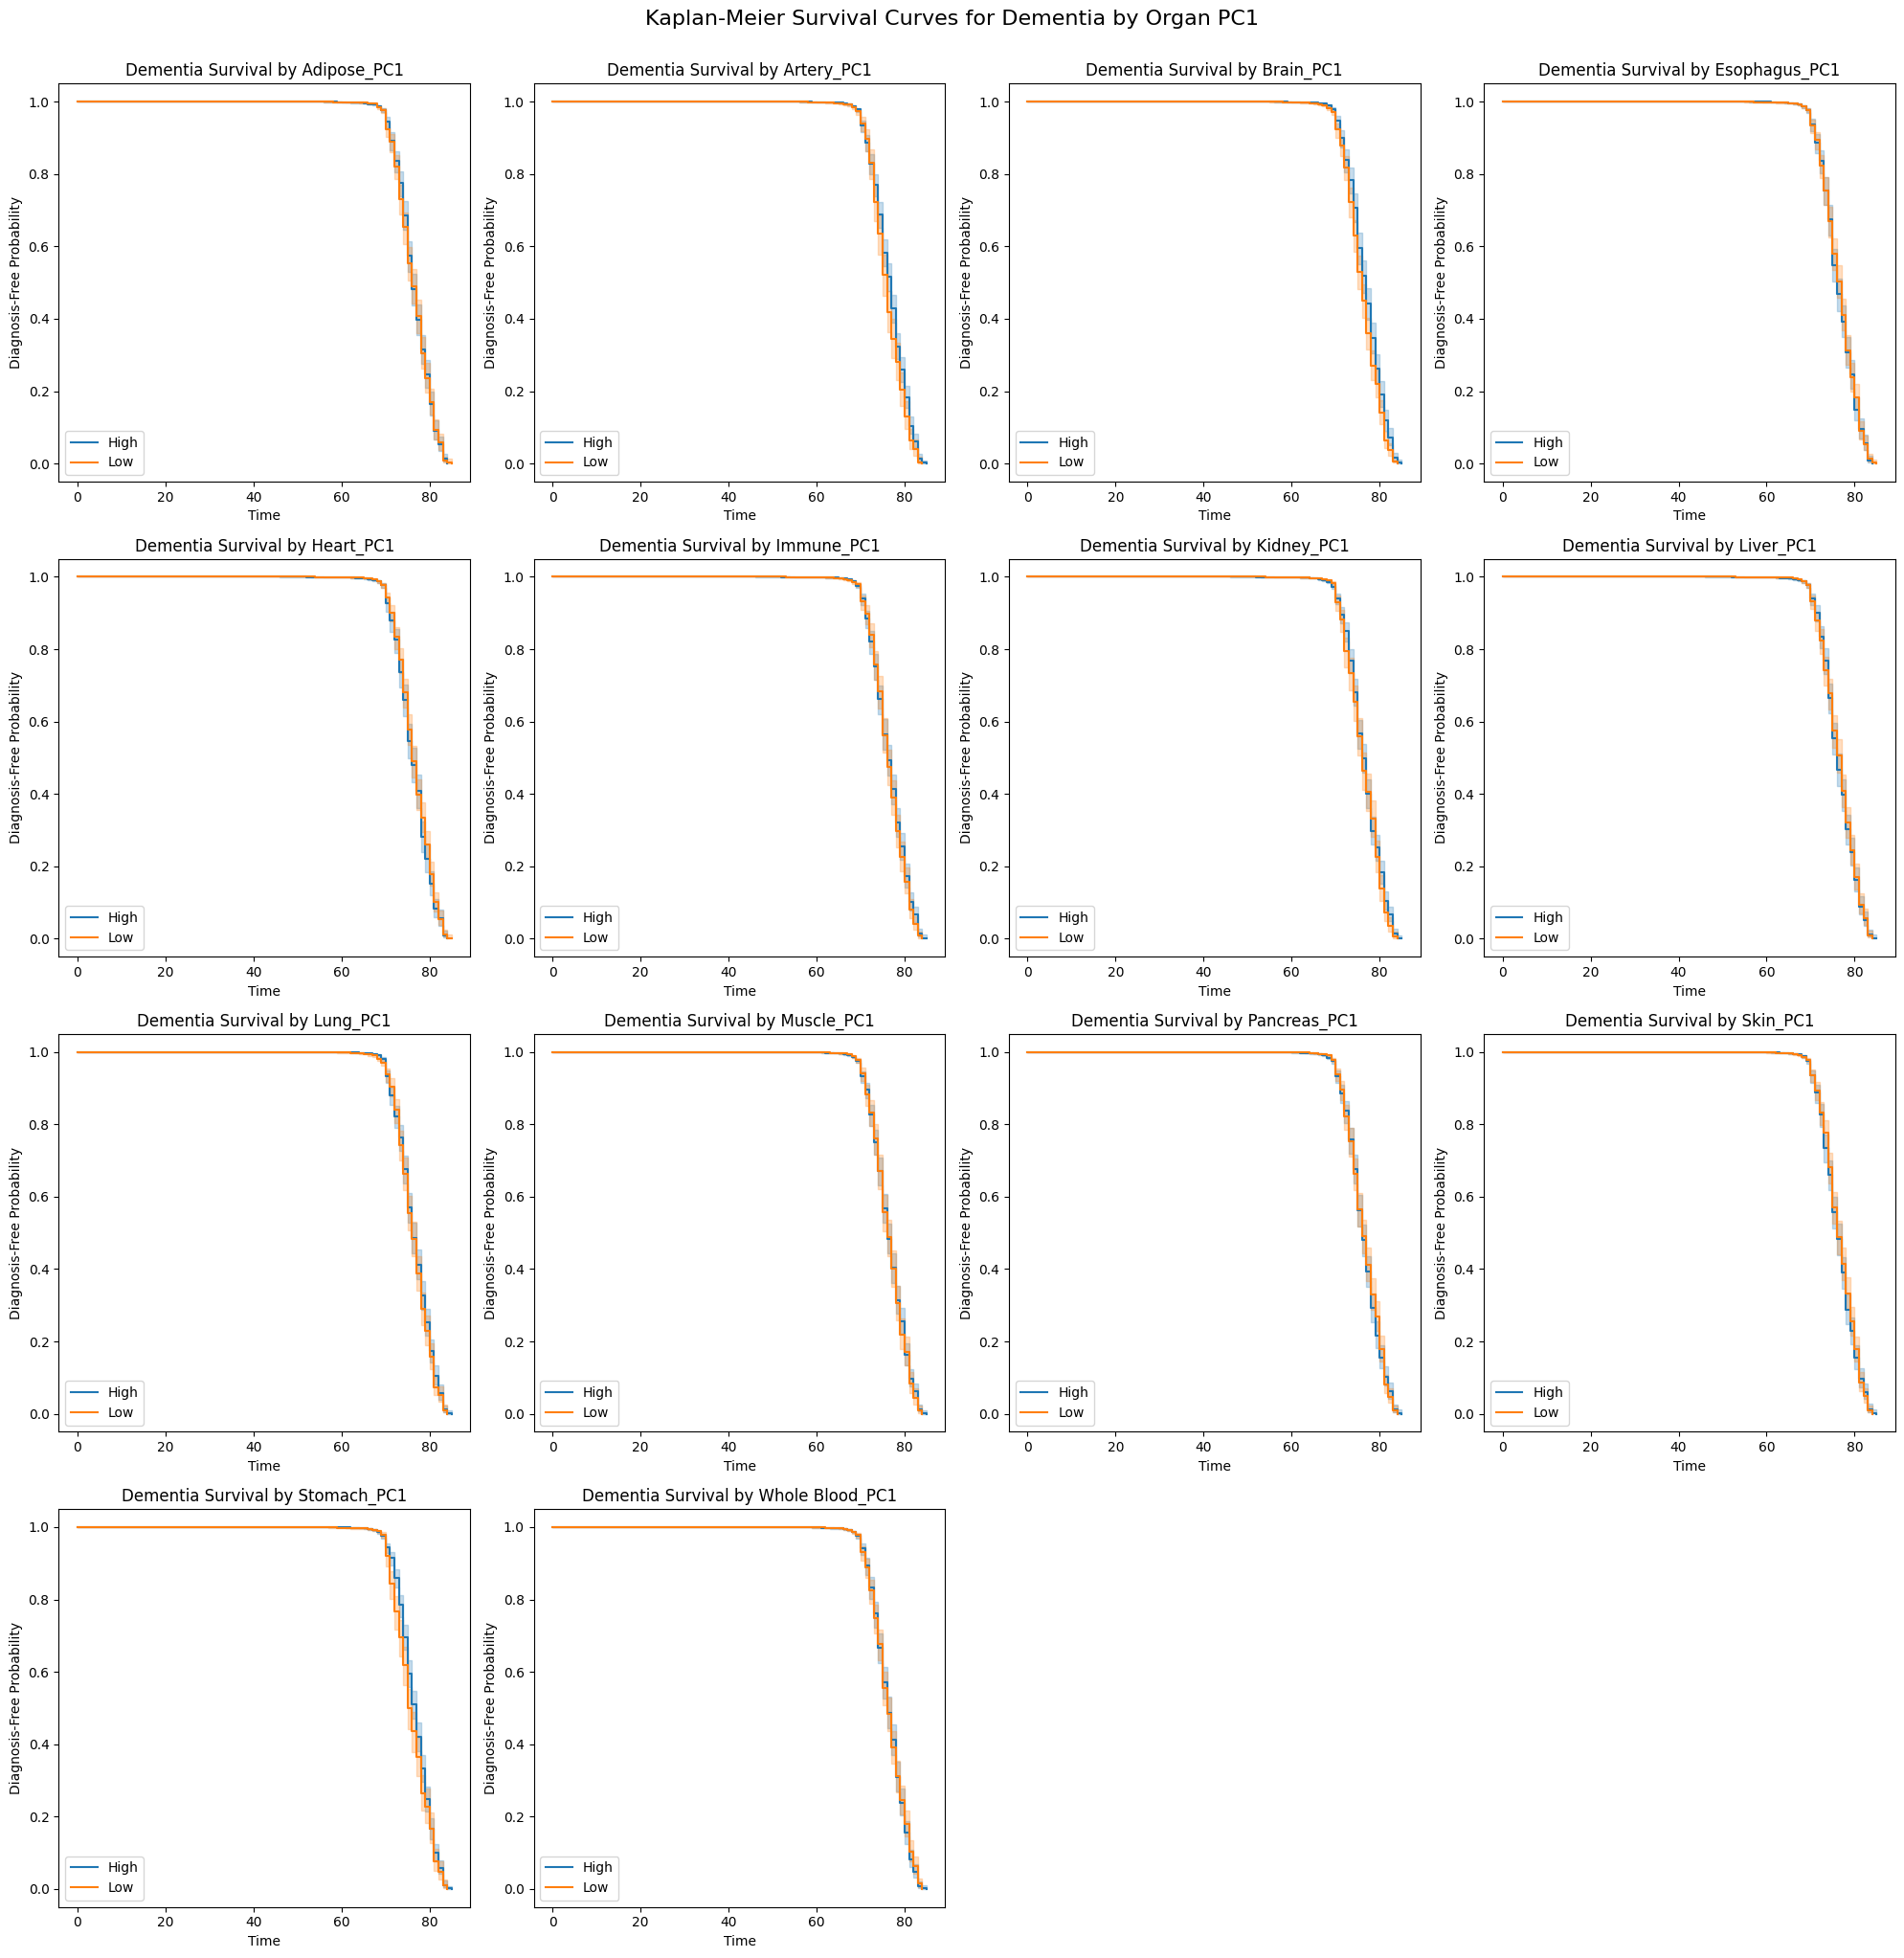

In [107]:
df_Dementia_PC1 = df_merged_PC1[df_merged_PC1['disease_group'].isin(['dementia', 'none'])].copy()
num_organs = len(organ_cols_pc1)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ PC1
for i, organ in enumerate(organ_cols_pc1):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_Dementia_PC1[organ].median()
    df_Dementia_PC1['organ_group'] = df_Dementia_PC1[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_Dementia_PC1['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_Dementia_PC1[mask]['event_time'], df_Dementia_PC1[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'Dementia Survival by {organ}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for Dementia by Organ PC1', fontsize=16, y=1.02)
plt.savefig("dementia_kaplan_meier_by_organ_PC1.png", dpi=300, bbox_inches='tight')
plt.show()

In [108]:
results = []

for organ in organ_cols_pc1:
    df_temp = df_Dementia_PC1[['event_time', 'event_observed', organ]].dropna()
    df_temp = df_temp.rename(columns={organ: 'OrganAgeGap'})
    
    cph = CoxPHFitter()
    cph.fit(df_temp, duration_col='event_time', event_col='event_observed')
    
    summary = cph.summary
    summary['organ'] = organ
    results.append(summary)

# Combine all summaries
all_results_df = pd.concat(results)

# Reorder columns for clarity
all_results_df = all_results_df.reset_index(drop=True)
cols_order = ['organ', 'coef', 'exp(coef)', 'se(coef)', 'p', 'exp(coef) lower 95%', 'exp(coef) upper 95%']
all_results_df = all_results_df[cols_order]

all_results_df

,organ,coef,exp(coef),se(coef),p,exp(coef) lower 95%,exp(coef) upper 95%
0,Adipose_PC1,0.004009,1.004017,0.021388,0.851330,0.962799,1.046999
1,Artery_PC1,-0.025997,0.974338,0.024952,0.297472,0.927833,1.023173
2,Brain_PC1,-0.031248,0.969236,0.008615,0.000287,0.953007,0.985740
3,Esophagus_PC1,0.014762,1.014871,0.033364,0.658165,0.950629,1.083455
4,Heart_PC1,0.015928,1.016056,0.027134,0.557185,0.963432,1.071554
5,Immune_PC1,-0.001498,0.998503,0.008459,0.859448,0.982085,1.015196
6,Kidney_PC1,0.013717,1.013811,0.025415,0.589397,0.964548,1.065591
7,Liver_PC1,0.003782,1.003789,0.009306,0.684423,0.985647,1.022266
8,Lung_PC1,-0.080582,0.922580,0.022812,0.000412,0.882239,0.964765
9,Muscle_PC1,-0.006752,0.993271,0.016008,0.673183,0.962591,1.024928


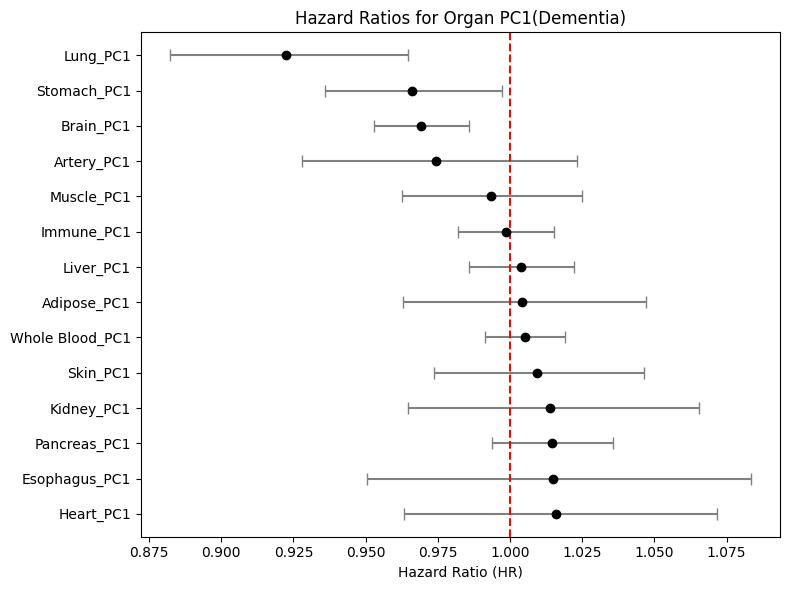

In [109]:
all_results_df_sorted = all_results_df.sort_values(by='exp(coef)', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
organs = all_results_df_sorted['organ']
hr = all_results_df_sorted['exp(coef)']
lower_ci = all_results_df_sorted['exp(coef) lower 95%']
upper_ci = all_results_df_sorted['exp(coef) upper 95%']

# Plot horizontal lines for confidence intervals
ax.errorbar(hr, organs, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Add a vertical line at HR = 1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

ax.set_xlabel('Hazard Ratio (HR)')
ax.set_title('Hazard Ratios for Organ PC1(Dementia)')
plt.tight_layout()
plt.savefig("HR_PC1_Dementia", dpi=300, bbox_inches='tight')
plt.show()